<div style = "text-align: center"><font size = 5.5 color = "#B22222" face = "verdana"><b>Groundwater level prediction</b></font></div><br/> 
<div style = "text-align: center"><font size = 4 color = "black" face = "verdana"><b>Well: Dinajpur-63 (Tazpur, Chirir Bandar)
</b></font></div>
<br/> 
<br/> 
<div style = "text-align: center"><font size = 4 color = "#00008B" face = "verdana"><b>Md.Abdullah-Al Mamun</b></font></div> 
<div style = "text-align: center"><font size = 3 color = "black" face = "verdana"><b>Master's Programme in Data Science</b></font></div> 
<div style = "text-align: center"><font size = 3 color = "black" face = "verdana"><b>Tampere University, Finland.</b></font></div><br/> 
<div style = "text-align: center"><font size = 4 color = "#00008B" face = "verdana"><b>Mst. Nazneen Aktar</b></font></div>
</font></div><div style = "text-align: center"><font size = 3 color = "black" face = "verdana"><b>B.Sc. in Disaster Management </b></font></div> 
<div style = "text-align: center"><font size = 3 color = "black" face = "verdana"><b>Begum Rokeya University, Rangpur, Bangladesh.</b></font>

# 1. Introduction

## About the dataset


Data was collected from meteorological stations in Rangpur, Saidpur, and Dinajpur through multiple sources, including the Bangladesh Meteorological Department (BMD), Bangladesh Water Development Board (BWDB), Food and Agricultural Organization (FAO), National Oceanic and Atmospheric Association (NOAA) Climate Prediction Center (CPC), Bangladesh Bureau of Statistics, and National Aeronautics and Space Administration (NASA). Additionally, monthly groundwater level (GWL) data for 12 selected wells was acquired from the Bangladesh Water Development Board (BWDB). The MODIS data was initially in Network Common Data Form (NetCDF) format and was subsequently converted to Excel format. This extensive dataset encompasses the period from 1993 to 2017.

We collected groundwater level data from three wells in the Rangpur district, and five wells in the Dinajpur district from the Bangladesh Water Development Board (BWDB). Groundwater level data collected daily(for particular dates in a month). However, groundwater level data, temperature data, and rainfall data are specific to their respective geographic areas, while the remaining data is common to all 8 wells' groundwater levels. We have predicted groundwater levels for each well sepeartly using various machine learning models, hyperparameter tuning, and hybrid modeling techniques. Finally, we have visualized our findings. 


## Data: 

**1.Groundwater Level (m)**
- GWL_Dinajpur-63

**2. Temperature (°C)**
- Dinajpur_Tave

**3. Rainfall (mm)**
- Dinajpur_PRCP

**4. MODIS Normalized Difference Vegetation Index (NDVI)**
- Dinajpur_NDVI

**5. Indian Ocean Dipole (IOD)**
- IOD
    
**6. Southern Oscillation Index (SOI)**
- SOI
    
**7. Nina3.4 Value**
- Nina3.4
    
**8. MEI Value**
- MEI



#### Note: 

1. We transformed monthly data into daily values, assuming they represent monthly averages. Due to a small dataset of only 300 rows, we applied a technique to treat it as daily data. After preprocessing, we obtained 9131 rows. Additionally, we normalized the data to maintain consistent scales, crucial for effective machine learning modelling.

2. Converting to daily values and normalizing aims to provide a solid foundation for accurate machine learning predictions and analyses. This preprocessing step enhances the reliability and performance of our models.


## Identifying the Features and Targets

### Features (Independent Variables):

1. Dinajpur_Tave
2. Dinajpur_PRCP
3. Dinajpur_NDVI
4. IOD
5. SOI
6. Nina3.4
7. MEI

### Target (Dependent Variable):

1.  GWL_Dinajpur-63

## Libraries

In [1]:
# Libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from scipy import stats
from tbats import TBATS
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from skopt import BayesSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from keras.models import Sequential
from skopt.space import Integer, Real
from sklearn.decomposition import PCA
from catboost import CatBoostRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.exceptions import ConvergenceWarning
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.gaussian_process import GaussianProcessRegressor
from statsmodels.nonparametric.kernel_regression import KernelReg
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, explained_variance_score

warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, module="skopt.optimizer.optimizer")
warnings.filterwarnings(action='ignore', category=UserWarning, module='xgboost')

### Loading dataset...

In [2]:
df = pd.read_excel(r'final_data_Dinajpur_63.xlsx')
df

,Date,Dinajpur_Tave,Dinajpur_PRCP,Dinajpur_NDVI,IOD,SOI,Nina3.4,MEI,GWL_Dinajpur-63
0,01.01.1993,14.8,42,0.1638,-0.025962,-8.2,0.28,0.925,3.162
1,02.01.1993,14.8,42,0.1638,-0.025962,-8.2,0.28,0.925,3.162
2,03.01.1993,14.8,42,0.1638,-0.025962,-8.2,0.28,0.925,3.162
3,04.01.1993,14.8,42,0.1638,-0.025962,-8.2,0.28,0.925,3.162
4,05.01.1993,14.8,42,0.1638,-0.025962,-8.2,0.28,0.925,3.162
...,...,...,...,...,...,...,...,...,...
9126,27.12.2017,24.6,0,0.1329,-0.204937,-1.4,-0.85,-0.404,4.800
9127,28.12.2017,24.6,0,0.1329,-0.204937,-1.4,-0.85,-0.404,4.800
9128,29.12.2017,24.6,0,0.1329,-0.204937,-1.4,-0.85,-0.404,4.800
9129,30.12.2017,24.6,0,0.1329,-0.204937,-1.4,-0.85,-0.404,4.800


In [3]:
df.columns

Index(['Date', 'Dinajpur_Tave', 'Dinajpur_PRCP', 'Dinajpur_NDVI', 'IOD', 'SOI',
       'Nina3.4', 'MEI', 'GWL_Dinajpur-63'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9131 entries, 0 to 9130
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             9131 non-null   object 
 1   Dinajpur_Tave    9131 non-null   float64
 2   Dinajpur_PRCP    9131 non-null   int64  
 3   Dinajpur_NDVI    9131 non-null   float64
 4   IOD              9131 non-null   float64
 5   SOI              9131 non-null   float64
 6   Nina3.4          9131 non-null   float64
 7   MEI              9131 non-null   float64
 8   GWL_Dinajpur-63  9131 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 642.1+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Dinajpur_Tave,9131.0,26.316318,11.841618,13.20000,22.300000,27.30000,29.000000,213.200000
Dinajpur_PRCP,9131.0,162.677363,193.538334,0.00000,3.000000,74.00000,285.000000,1026.000000
Dinajpur_NDVI,9131.0,0.217515,0.082181,0.06320,0.152000,0.19990,0.271600,0.445800
IOD,9131.0,0.004448,0.344990,-0.88667,-0.203742,-0.02345,0.207985,1.472656
SOI,9131.0,-0.491052,10.714015,-28.60000,-7.800000,0.10000,7.700000,27.100000
Nina3.4,9131.0,0.007095,0.870827,-1.79000,-0.560000,-0.08000,0.480000,2.570000
MEI,9131.0,-0.005756,1.035444,-1.96400,-0.771000,-0.22500,0.612500,3.214000
GWL_Dinajpur-63,9131.0,6.229414,2.461229,1.75250,4.255000,6.15500,8.022500,12.157500


In [6]:
df["GWL_Dinajpur-63"].describe()

count    9131.000000
mean        6.229414
std         2.461229
min         1.752500
25%         4.255000
50%         6.155000
75%         8.022500
max        12.157500
Name: GWL_Dinajpur-63, dtype: float64

In [7]:
cols_to_convert = df.columns.difference(['Date'])
df[cols_to_convert] = df[cols_to_convert].astype(float)

# 2. Data Exploration and Analysis
## Visualizing the distribution


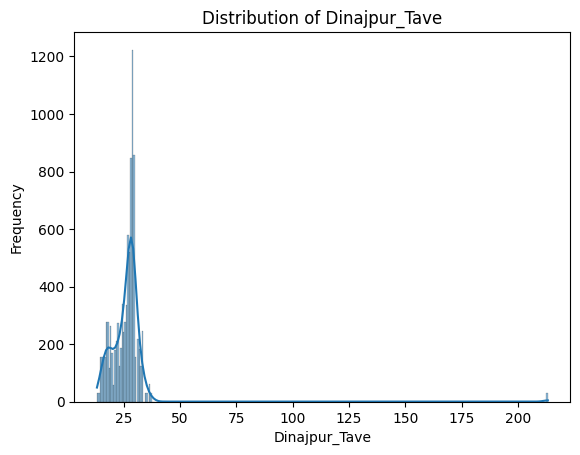

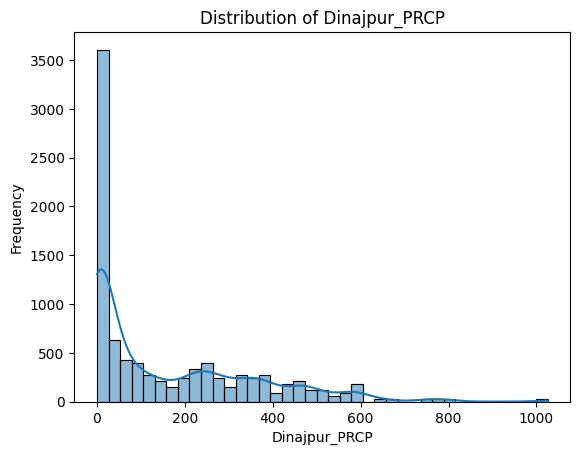

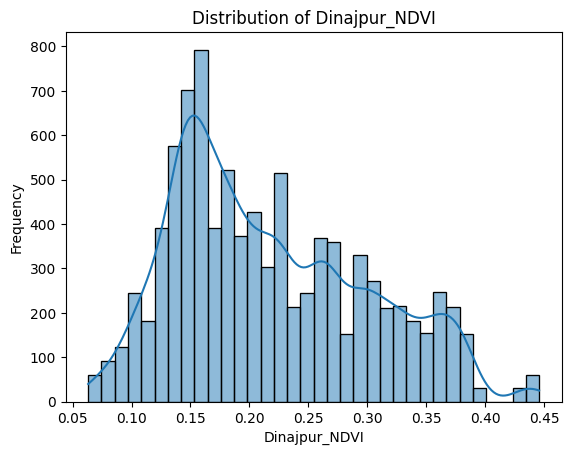

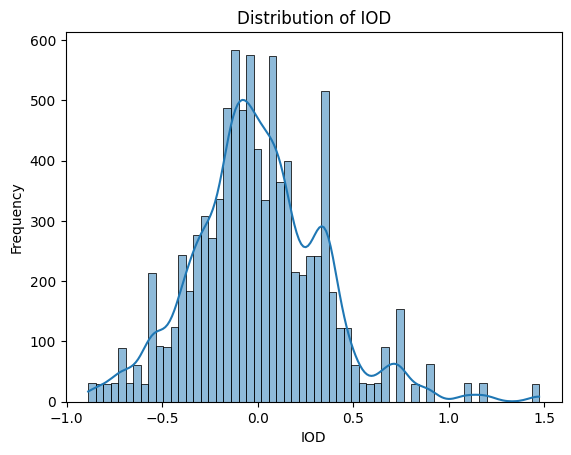

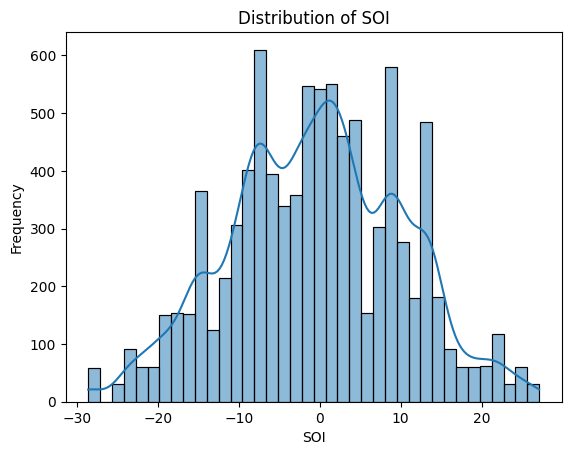

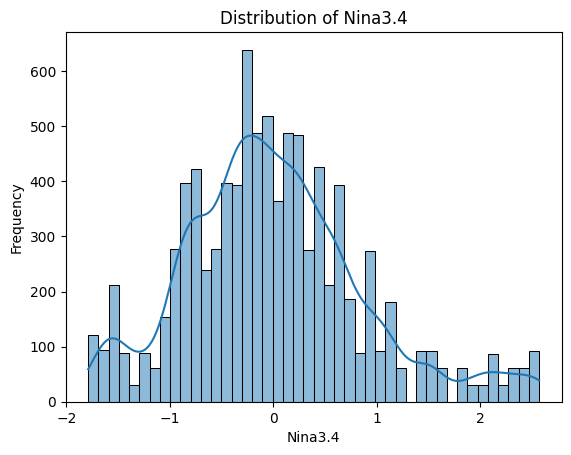

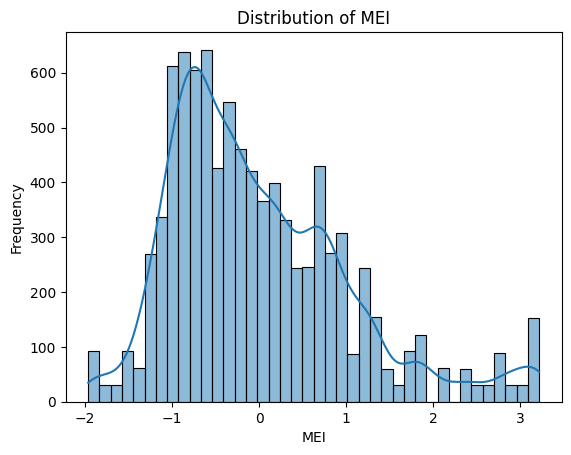

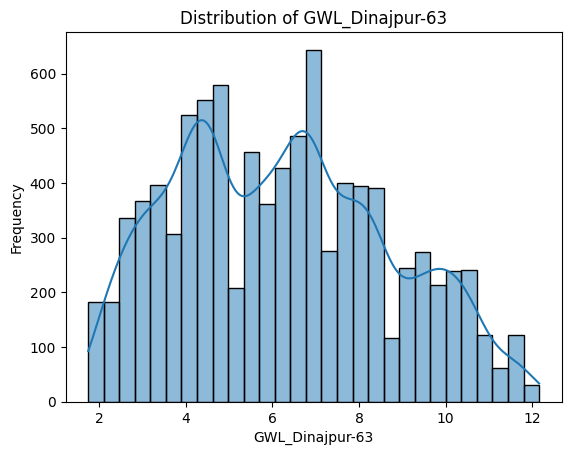

In [8]:
def plot_distribution(df, columns):
    for column in columns:
        if column != 'Date':  
            sns.histplot(df[column], kde=True)
            plt.title(f"Distribution of {column}")
            plt.xlabel(column)  
            plt.ylabel("Frequency")  
            plt.show()


numerical_cols = df.columns[1:]  

plot_distribution(df, numerical_cols)

## Data Cleaning,Checking errors, Missing values

In [9]:
from DataFrame_Checker import DataFrameChecker

#  an instance of DataFrameChecker
checker = DataFrameChecker(df)

# Calling the checking functions
checker.check_errors()

Errors in DataFrame:
No errors found in DataFrame


In [10]:
checker.check_missing_values()

No missing values found in DataFrame


## Outlier detection(Normality test)

In [11]:
def detect_outliers(data, threshold=1.5):
    outliers = None
    total_outliers = 0
    
    if pd.api.types.is_numeric_dtype(data):
        alpha = 0.05
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            stat, p = stats.shapiro(data.dropna())

        if p > alpha:
            # Normal distribution, using Z-score method (Shapiro-Wilk test)
            z_scores = np.abs(stats.zscore(data))
            column_outliers = data[z_scores > threshold]
        else:
            # Non-normal distribution, use Tukey's method
            q1 = np.percentile(data, 25)
            q3 = np.percentile(data, 75)
            iqr = q3 - q1
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr
            column_outliers = data[(data < lower_bound) | (data > upper_bound)]
        
        if column_outliers is not None:
            outliers = column_outliers
            total_outliers += len(column_outliers)
    
    return outliers, total_outliers

In [12]:
def visualize_outliers(outliers):
    if outliers is not None:
        num_outliers = len(outliers.columns)
        num_rows = (num_outliers + 2) // 3  
        
        fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))
        axs = axs.flatten() 
        
        for i, column in enumerate(outliers.columns):
            ax = axs[i]
            ax.boxplot(outliers[column].values, showfliers=False)
            ax.scatter(range(1, len(outliers)+1), outliers[column].values, color='red', marker='o', label='Outliers')
            ax.set_xlabel('Columns')
            ax.set_ylabel('Values')
            ax.set_title(f'Outliers - {column}')
            ax.legend()        
        
        for j in range(num_outliers, len(axs)):
            fig.delaxes(axs[j])
        
        plt.tight_layout()
        plt.show()
    else:
        print('No outliers detected.')

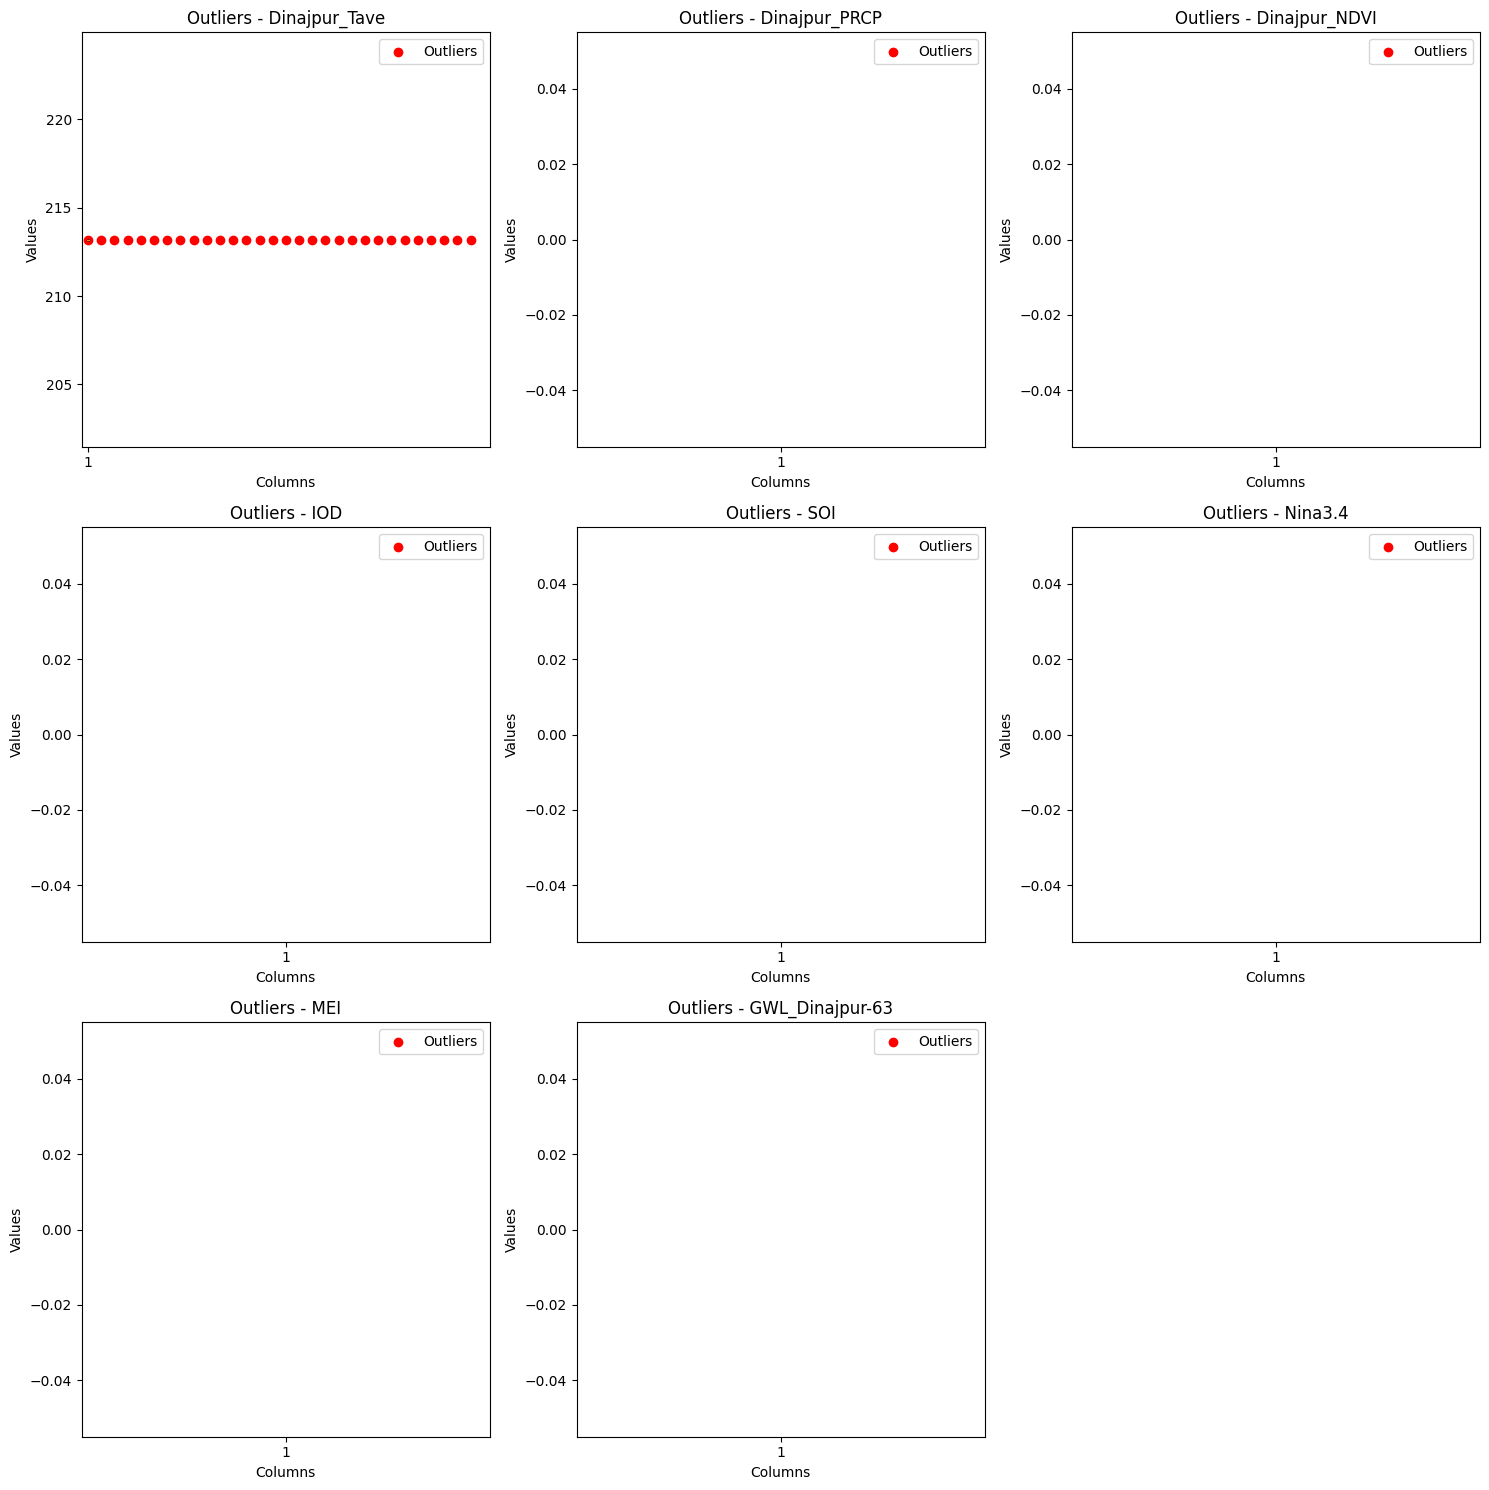

Number of total outliers: 1004


In [13]:
# Detecting outliers for all numeric columns
all_outliers = pd.DataFrame()
total_outliers = 0
numeric_columns = df.select_dtypes(include=np.number).columns
for column in numeric_columns:
    column_data = df[column]
    column_outliers, column_total_outliers = detect_outliers(column_data)
    if column_outliers is not None:
        all_outliers[column] = column_outliers
        total_outliers += column_total_outliers

# Visualizing outliers with a maximum of 3 graphs in a row
visualize_outliers(all_outliers)

# the number of total outliers in all columns
print("Number of total outliers:", total_outliers)

## Multicollinearity statistics

In [14]:
numeric_df = df.iloc[:, 1:-1]  

# Calculating VIF for each variable
vif_data = numeric_df.copy()
vif_data['Intercept'] = 1 

# Calculating VIF values
vif_values = pd.Series([variance_inflation_factor(vif_data.values, i) 
                        for i in range(vif_data.shape[1])], 
                       index=vif_data.columns)

# Calculating Tolerance from VIF
tolerance_values = 1 / vif_values

# Displaying the results
print("VIF Values:")
print(vif_values)

print("\nTolerance Values:")
print(tolerance_values)

VIF Values:
Dinajpur_Tave     1.051337
Dinajpur_PRCP     1.057454
Dinajpur_NDVI     1.092486
IOD               1.194398
SOI               2.160893
Nina3.4           2.633041
MEI               1.561941
Intercept        14.448456
dtype: float64

Tolerance Values:
Dinajpur_Tave    0.951170
Dinajpur_PRCP    0.945668
Dinajpur_NDVI    0.915343
IOD              0.837242
SOI              0.462772
Nina3.4          0.379789
MEI              0.640229
Intercept        0.069212
dtype: float64


# 3.  Machine Learning Modelling

## Data Splitting

In [15]:
X = df.drop(columns=['GWL_Dinajpur-63', 'Date'])
y = df['GWL_Dinajpur-63']

# Splitting data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### ## Visualization: Data Splitting for Machine Learning

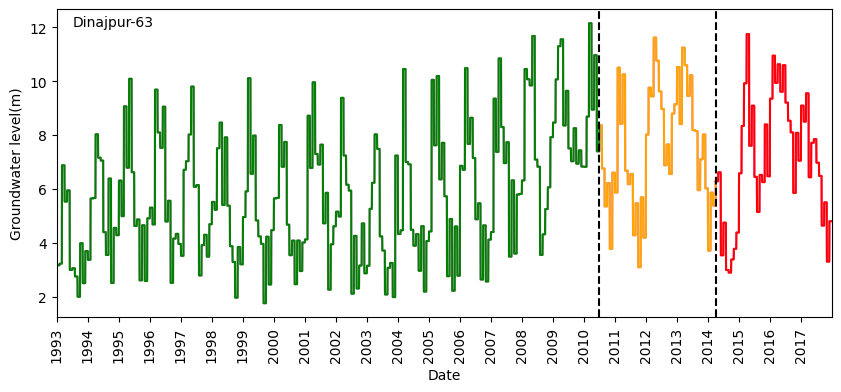

In [16]:
# Converting 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

# Sorting DataFrame by 'Date'
df = df.sort_values(by='Date')

# Creating a time series plot
plt.figure(figsize=(10, 4))

# Plotting the entire dataset
plt.plot(df['Date'], df['GWL_Dinajpur-63'], color='violet')

# Plotting training data
plt.plot(df['Date'][:len(X_train)], df['GWL_Dinajpur-63'][:len(X_train)], color='green', label='Training Set')

# Plotting validation data
plt.plot(df['Date'][len(X_train):len(X_train) + len(X_val)], df['GWL_Dinajpur-63'][len(X_train):len(X_train) + len(X_val)], color='orange', label='Validation Set')

# Plotting test data
plt.plot(df['Date'][len(X_train) + len(X_val):], df['GWL_Dinajpur-63'][len(X_train) + len(X_val):], color='red', label='Test Set')

plt.axvline(df['Date'][len(X_train)], color='black', linestyle='--')
plt.axvline(df['Date'][len(X_train) + len(X_val)], color='black', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Groundwater level(m)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlim(df['Date'].min(), df['Date'].max())
plt.xticks(rotation=90) 
plt.text(0.02, 0.98,"Dinajpur-63", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.grid(False)
plt.show()

In [17]:
X_train

,Dinajpur_Tave,Dinajpur_PRCP,Dinajpur_NDVI,IOD,SOI,Nina3.4,MEI
3063,27.7,222.0,0.3292,-0.157832,-9.0,-0.30,-0.322
1940,26.4,148.0,0.1080,-0.131525,-24.4,0.90,2.821
6848,27.4,0.0,0.1967,0.348779,7.3,-0.93,-0.071
3509,28.9,246.0,0.1252,-0.293105,-14.6,0.70,0.636
1612,29.1,501.0,0.1765,0.010510,-24.1,1.15,2.602
...,...,...,...,...,...,...,...
5734,28.7,242.0,0.1999,0.050483,13.5,-0.28,-0.318
5191,23.2,2.0,0.2692,0.147723,-1.4,-0.15,-0.864
5390,26.8,51.0,0.1459,0.130834,5.4,-1.40,-0.669
860,30.3,54.0,0.2495,-0.039353,-9.0,0.03,0.940


In [18]:
y_train

3063     7.296667
1940     8.465000
6848     3.092000
3509     4.255000
1612     6.078000
          ...    
5734     4.312500
5191     7.377500
5390     3.597500
860     10.092500
7270     8.796667
Name: GWL_Dinajpur-63, Length: 6391, dtype: float64

In [19]:
X_temp

,Dinajpur_Tave,Dinajpur_PRCP,Dinajpur_NDVI,IOD,SOI,Nina3.4,MEI
4043,14.8,7.0,0.1418,-0.116838,-11.6,0.26,0.526
3573,26.4,56.0,0.3521,0.626101,-7.4,1.16,1.090
4505,27.1,255.0,0.1897,0.196267,-14.5,0.30,0.588
5381,28.3,234.0,0.1418,0.380060,1.4,-1.04,-0.800
2881,22.6,0.0,0.1011,-0.029802,22.4,-0.75,-0.397
...,...,...,...,...,...,...,...
1489,15.5,21.0,0.2406,-0.058970,4.1,-0.43,-0.453
812,23.8,10.0,0.2367,0.107568,3.5,0.49,0.935
1882,19.6,17.0,0.1146,0.134668,-19.2,2.08,2.823
4974,29.5,126.0,0.1101,0.164956,-15.9,0.37,-0.474


In [20]:
y_temp

4043    4.3250
3573    3.1525
4505    6.3560
5381    6.3175
2881    2.9480
         ...  
1489    3.5140
812     9.0700
1882    5.2260
4974    5.4650
4039    4.3250
Name: GWL_Dinajpur-63, Length: 2740, dtype: float64

In [21]:
X_val

,Dinajpur_Tave,Dinajpur_PRCP,Dinajpur_NDVI,IOD,SOI,Nina3.4,MEI
7609,21.4,0.0,0.1407,-0.067228,9.2,-0.02,-0.911
4084,25.2,12.0,0.1778,-0.109683,0.2,-0.10,0.118
7920,32.1,424.0,0.1272,-0.465427,-7.6,0.37,-0.523
8327,31.4,0.0,0.3561,0.403764,-20.2,2.21,-0.228
2716,28.9,399.0,0.1538,-0.067885,-5.5,-0.75,-0.711
...,...,...,...,...,...,...,...
5762,26.3,45.0,0.3646,0.102282,13.4,-0.30,-0.012
3254,213.2,53.0,0.1593,-0.082291,7.2,-0.28,-0.290
4541,29.3,474.0,0.1731,0.016435,2.6,0.22,0.737
350,19.0,0.0,0.1413,-0.157270,1.6,0.19,0.784


In [22]:
X_test

,Dinajpur_Tave,Dinajpur_PRCP,Dinajpur_NDVI,IOD,SOI,Nina3.4,MEI
4710,21.7,0.0,0.1467,-0.361621,-2.0,-0.44,-0.998
131,26.8,308.0,0.1435,0.312997,-8.2,0.93,1.860
2802,27.9,196.0,0.1075,0.012307,9.9,-0.39,-0.113
4472,24.4,37.0,0.1239,-0.561639,0.2,0.28,0.631
1108,16.5,16.0,0.2660,0.337663,8.4,-0.65,-0.437
...,...,...,...,...,...,...,...
2948,15.5,0.0,0.2584,0.152971,8.4,-0.88,-0.706
6394,29.6,356.0,0.3326,-0.197084,20.5,-0.89,-1.964
1746,25.5,3.0,0.1809,1.088737,-17.8,2.29,3.214
5820,19.1,0.0,0.4334,-0.102193,13.3,-0.90,-0.540


In [23]:
y_val

7609     8.022000
4084    10.455000
7920     2.890000
8327     6.253333
2716     4.672500
          ...    
5762     5.252000
3254     3.942500
4541     7.712500
350      3.690000
2164     3.198000
Name: GWL_Dinajpur-63, Length: 1370, dtype: float64

In [24]:
y_test

4710    4.604000
131     5.946000
2802    2.460000
4472    7.622000
1108    5.303333
          ...   
2948    4.124000
6394    8.360000
1746    4.295000
5820    7.922500
6160    7.432500
Name: GWL_Dinajpur-63, Length: 1370, dtype: float64

In [25]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Dinajpur_Tave,6391.0,26.531920,12.933740,13.20000,22.500000,27.400000,29.100000,213.200000
Dinajpur_PRCP,6391.0,165.978251,195.709441,0.00000,3.000000,77.000000,287.000000,1026.000000
Dinajpur_NDVI,6391.0,0.218292,0.082821,0.06320,0.152000,0.201200,0.274000,0.445800
IOD,6391.0,0.001845,0.342237,-0.88667,-0.204923,-0.024343,0.203625,1.472656
SOI,6391.0,-0.442857,10.669366,-28.60000,-7.800000,0.100000,7.700000,27.100000
Nina3.4,6391.0,0.004907,0.865949,-1.79000,-0.565000,-0.070000,0.480000,2.570000
MEI,6391.0,-0.010235,1.037451,-1.96400,-0.774000,-0.228000,0.631000,3.214000


In [26]:
# Getting the indices of the data points in each set
train_indices = X_train.index
val_indices = X_val.index
test_indices = X_test.index

# Checking if there's any overlap between the sets
assert len(set(train_indices).intersection(val_indices)) == 0, "Overlap between training and validation sets!"
assert len(set(train_indices).intersection(test_indices)) == 0, "Overlap between training and test sets!"
assert len(set(val_indices).intersection(test_indices)) == 0, "Overlap between validation and test sets!"

# If the code reaches this point, it means there is no overlap
print("No overlap detected. Data splitting is correct.")

No overlap detected. Data splitting is correct.


### Descriptive Statistics(Training,Validation and Testing stage)

In [27]:
# Training Set: Descriptive Statistics
train_stats = X_train.describe()
print("Descriptive Statistics: Training Set ")
train_stats.T

Descriptive Statistics: Training Set 


,count,mean,std,min,25%,50%,75%,max
Dinajpur_Tave,6391.0,26.531920,12.933740,13.20000,22.500000,27.400000,29.100000,213.200000
Dinajpur_PRCP,6391.0,165.978251,195.709441,0.00000,3.000000,77.000000,287.000000,1026.000000
Dinajpur_NDVI,6391.0,0.218292,0.082821,0.06320,0.152000,0.201200,0.274000,0.445800
IOD,6391.0,0.001845,0.342237,-0.88667,-0.204923,-0.024343,0.203625,1.472656
SOI,6391.0,-0.442857,10.669366,-28.60000,-7.800000,0.100000,7.700000,27.100000
Nina3.4,6391.0,0.004907,0.865949,-1.79000,-0.565000,-0.070000,0.480000,2.570000
MEI,6391.0,-0.010235,1.037451,-1.96400,-0.774000,-0.228000,0.631000,3.214000


In [28]:
# Validation Set: Descriptive Statistics
val_stats = X_val.describe()
print("\nDescriptive Statistics: Validation Set ")
val_stats.T


Descriptive Statistics: Validation Set 


,count,mean,std,min,25%,50%,75%,max
Dinajpur_Tave,1370.0,25.709197,7.157877,13.20000,22.125000,27.00000,29.000000,213.200000
Dinajpur_PRCP,1370.0,153.270803,184.765685,0.00000,3.000000,64.00000,273.000000,1026.000000
Dinajpur_NDVI,1370.0,0.217190,0.080513,0.06320,0.153275,0.19960,0.274000,0.445800
IOD,1370.0,0.003595,0.355028,-0.88667,-0.204923,-0.02345,0.213949,1.472656
SOI,1370.0,-0.599489,10.584601,-28.60000,-8.000000,0.10000,7.300000,27.100000
Nina3.4,1370.0,0.015898,0.864088,-1.79000,-0.545000,-0.07000,0.470000,2.570000
MEI,1370.0,-0.015441,1.004000,-1.96400,-0.730500,-0.25600,0.582000,3.214000


In [29]:
# Test Set: Descriptive Statistics
test_stats = X_test.describe()
print("\nDescriptive Statistics: Testing Set ")
test_stats.T


Descriptive Statistics: Testing Set 


,count,mean,std,min,25%,50%,75%,max
Dinajpur_Tave,1370.0,25.917664,10.118151,13.20000,22.100000,27.300000,28.900000,213.200000
Dinajpur_PRCP,1370.0,156.685401,191.600047,0.00000,1.000000,55.000000,281.000000,1026.000000
Dinajpur_NDVI,1370.0,0.214213,0.080795,0.06320,0.148500,0.199600,0.267800,0.445800
IOD,1370.0,0.017447,0.347552,-0.88667,-0.178294,0.010084,0.227375,1.472656
SOI,1370.0,-0.607445,11.051441,-28.60000,-7.900000,0.000000,7.700000,27.100000
Nina3.4,1370.0,0.008496,0.900322,-1.79000,-0.570000,-0.090000,0.480000,2.570000
MEI,1370.0,0.024823,1.057025,-1.96400,-0.729000,-0.220000,0.644000,3.214000


## Normalization of the data

In [30]:
# Normalization of the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns = X_train.columns
)

X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns = X_test.columns
)

X_val = pd.DataFrame(
    scaler.transform(X_val),
    columns = X_val.columns
)

In [31]:
X_train.head(2)

,Dinajpur_Tave,Dinajpur_PRCP,Dinajpur_NDVI,IOD,SOI,Nina3.4,MEI
0,0.09032,0.286272,1.339238,-0.466604,-0.802092,-0.352135,-0.300534
1,-0.01020,-0.091869,-1.331796,-0.389732,-2.245590,1.033736,2.729244


In [32]:
X_test.head(2)

,Dinajpur_Tave,Dinajpur_PRCP,Dinajpur_NDVI,IOD,SOI,Nina3.4,MEI
0,-0.373620,-0.848151,-0.864486,-1.062112,-0.145957,-0.513820,-0.952183
1,0.020729,0.725733,-0.903126,0.909241,-0.727105,1.068383,1.802862


In [33]:
X_val.head(2)

,Dinajpur_Tave,Dinajpur_PRCP,Dinajpur_NDVI,IOD,SOI,Nina3.4,MEI
0,-0.396817,-0.848151,-0.936937,-0.201844,0.903860,-0.028765,-0.868317
1,-0.102988,-0.786831,-0.488947,-0.325903,0.060257,-0.121156,0.123615


## Machine Learning Modelling

In [34]:
# Base models

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Ridge': Ridge(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'ElasticNet Regression': ElasticNet(),
    'Gaussian Process Regressor': GaussianProcessRegressor(random_state=42),
    'Weighted K-Nearest Neighbors': KNeighborsRegressor(weights='distance'),
    'LightGBM': LGBMRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(random_state=42, verbose=0),
    'XGBoost': XGBRegressor(),
    'Bayesian Ridge Regression': BayesianRidge(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'Locally Weighted Linear Regression': KNeighborsRegressor(n_neighbors=5, weights='distance')
}

results = {}

for name, model in models.items():
    # Training the model
    model.fit(X_train, y_train)
    
    # Predicting on the training set
    y_pred_train = model.predict(X_train)
    
    # Predicting on the validation set
    y_pred_val = model.predict(X_val)
    
    # Predicting on the test set
    y_pred_test = model.predict(X_test)

    # Calculating metrics for the training set
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    train_mae = mean_absolute_error(y_train, y_pred_train)
    train_r2 = r2_score(y_train, y_pred_train)
    train_rae = mean_absolute_percentage_error(y_train, y_pred_train)
    train_cc = np.corrcoef(y_train, y_pred_train)[0, 1]

    # Calculating metrics for the validation set
    val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
    val_mae = mean_absolute_error(y_val, y_pred_val)
    val_r2 = r2_score(y_val, y_pred_val)
    val_rae = mean_absolute_percentage_error(y_val, y_pred_val)
    val_cc = np.corrcoef(y_val, y_pred_val)[0, 1]
    
    # Calculating metrics for the test set
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)
    test_rae = mean_absolute_percentage_error(y_test, y_pred_test)
    test_cc = np.corrcoef(y_test, y_pred_test)[0, 1]

    results[name] = {
        'Train RMSE': train_rmse,
        'Train MAE': train_mae,
        'Train R-squared': train_r2,
        'Train RAE': train_rae,
        'Train CC': train_cc,        
        'Validation RMSE': val_rmse,
        'Validation MAE': val_mae,
        'Validation R-squared': val_r2,
        'Validation RAE': val_rae,
        'Validation CC': val_cc,
        'Test RMSE': test_rmse,
        'Test MAE': test_mae,
        'Test R-squared': test_r2,
        'Test RAE': test_rae,
        'Test CC': test_cc
    }

# Printing the results
for model, metrics in results.items():
    print(f"Metrics for {model}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:}")
    print("\n")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000312 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1443
[LightGBM] [Info] Number of data points in the train set: 6391, number of used features: 7
[LightGBM] [Info] Start training from score 6.237173
Metrics for Linear Regression:
Train RMSE: 2.376896873057042
Train MAE: 2.008006208684482
Train R-squared: 0.06612045177756642
Train RAE: 0.40996296822691264
Train CC: 0.2571389736651499
Validation RMSE: 2.4006386249253056
Validation MAE: 2.033221995222072
Validation R-squared: 0.047348161672399636
Validation RAE: 0.425830354438997
Validation CC: 0.22234034004326417
Test RMSE: 2.397605978139791
Test MAE: 2.032880029877911
Test R-squared: 0.05669020887895648
Test RAE: 0.4142015239512896
Test CC: 0.23854913281224682


Metrics for Decision Tree:
Train RMSE: 2.0104749525313994e-15
Train MAE: 1.4656472631454304e-15
Train R-squared: 1.0
Train RAE: 2.31643377

# 4. Hyperparameter tuning

## 1. Random Forest Regressor ( Hyperparameter Tuning)

In [35]:
# Initializing Random Forest model
random_forest = RandomForestRegressor()

# the hyperparameters and their possible values for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 5, 10],    
    'min_samples_split': [2, 5, 10] 
}

# Initializing Grid Search for Random Forest
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, scoring='neg_mean_squared_error', cv=5)

# Performing Grid Search for Random Forest
grid_search_rf.fit(X_train, y_train)

# Getting the best hyperparameters and model for Random Forest
best_rf = grid_search_rf.best_estimator_
best_params_rf = grid_search_rf.best_params_

# Predicting on training set using Random Forest
rf_pred_train = best_rf.predict(X_train)

# Calculating metrics for Random Forest on training set
rf_rmse_train = np.sqrt(mean_squared_error(y_train, rf_pred_train))
rf_mae_train = mean_absolute_error(y_train, rf_pred_train)
rf_r2_train = r2_score(y_train, rf_pred_train)
rf_rae_train = mean_absolute_percentage_error(y_train, rf_pred_train)
rf_cc_train = np.corrcoef(y_train, rf_pred_train)[0, 1]

# Predicting on validation set using Random Forest
rf_pred_val = best_rf.predict(X_val)

# Calculating metrics for Random Forest on validation set
rf_rmse_val = np.sqrt(mean_squared_error(y_val, rf_pred_val))
rf_mae_val = mean_absolute_error(y_val, rf_pred_val)
rf_r2_val = r2_score(y_val, rf_pred_val)
rf_rae_val = mean_absolute_percentage_error(y_val, rf_pred_val)
rf_cc_val = np.corrcoef(y_val, rf_pred_val)[0, 1]

# Predicting on test set using Random Forest
rf_pred_test = best_rf.predict(X_test)

# Calculating metrics for Random Forest on test set
rf_rmse_test = np.sqrt(mean_squared_error(y_test, rf_pred_test))
rf_mae_test = mean_absolute_error(y_test, rf_pred_test)
rf_r2_test = r2_score(y_test, rf_pred_test)
rf_rae_test = mean_absolute_percentage_error(y_test, rf_pred_test)
rf_cc_test = np.corrcoef(y_test, rf_pred_test)[0, 1]

print("Best Hyperparameters for Random Forest:", best_params_rf)
print()

# Printing metrics for training set
print("Random Forest RMSE (Train):", rf_rmse_train)
print("Random Forest MAE (Train):", rf_mae_train)
print("Random Forest R-squared (Train):", rf_r2_train)
print("Random Forest RAE (Train):", rf_rae_train)
print("Random Forest CC (Train):", rf_cc_train)

print()


print("Random Forest RMSE (Validation):", rf_rmse_val)
print("Random Forest MAE (Validation):", rf_mae_val)
print("Random Forest R-squared (Validation):", rf_r2_val)
print("Random Forest RAE (Validation):", rf_rae_val)
print("Random Forest CC (Validation):", rf_cc_val)

print()

print("Random Forest RMSE (Test):", rf_rmse_test)
print("Random Forest MAE (Test):", rf_mae_test)
print("Random Forest R-squared (Test):", rf_r2_test)
print("Random Forest RAE (Test):", rf_rae_test)
print("Random Forest CC (Test):", rf_cc_test)

Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}

Random Forest RMSE (Train): 4.597994231022989e-15
Random Forest MAE (Train): 3.624667109687645e-15
Random Forest R-squared (Train): 1.0
Random Forest RAE (Train): 5.779311574277238e-16
Random Forest CC (Train): 1.0

Random Forest RMSE (Validation): 4.5411671199101e-15
Random Forest MAE (Validation): 3.5561172822336585e-15
Random Forest R-squared (Validation): 1.0
Random Forest RAE (Validation): 5.762087978143067e-16
Random Forest CC (Validation): 1.0

Random Forest RMSE (Test): 4.730587488070466e-15
Random Forest MAE (Test): 3.736184111483081e-15
Random Forest R-squared (Test): 1.0
Random Forest RAE (Test): 5.960707424103678e-16
Random Forest CC (Test): 0.9999999999999997


## 2. AdaBoost ( Hyperparameter Tuning)

In [36]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# Define the AdaBoostRegressor model
adaboost = AdaBoostRegressor(random_state=42)

# Define the search space for hyperparameters
param_space = {
    'n_estimators': Integer(50, 200),      # Number of estimators
    'learning_rate': Real(0.01, 1.0, prior='log-uniform'),  # Learning rate
    'loss': ['linear', 'square', 'exponential']  # Loss function options
}

# Initialize Bayesian Optimization for AdaBoostRegressor
adaboost_search = BayesSearchCV(
    adaboost, 
    param_space, 
    n_iter=50, 
    scoring='neg_mean_squared_error',
    cv=5, 
    n_jobs=-1,
    random_state=42
)

# Perform Bayesian Optimization for AdaBoostRegressor
adaboost_search.fit(X_train, y_train)

# Get the best hyperparameters and model for AdaBoostRegressor
best_adaboost = adaboost_search.best_estimator_
best_params_adaboost = adaboost_search.best_params_

# Predicting on training set using AdaBoostRegressor
adaboost_pred_train = best_adaboost.predict(X_train)

adaboost_rae_train = np.mean(np.abs(y_train - adaboost_pred_train) / np.abs(y_train))
adaboost_cc_train = np.corrcoef(y_train, adaboost_pred_train)[0, 1]
adaboost_rmse_train = np.sqrt(mean_squared_error(y_train, adaboost_pred_train))
adaboost_mae_train = mean_absolute_error(y_train, adaboost_pred_train)
adaboost_r2_train = r2_score(y_train, adaboost_pred_train)

print("Best Hyperparameters for AdaBoostRegressor:", best_params_adaboost)
print()

print("AdaBoostRegressor RMSE (Train):", adaboost_rmse_train)
print("AdaBoostRegressor MAE (Train):", adaboost_mae_train)
print("AdaBoostRegressor R-squared (Train):", adaboost_r2_train)
print("AdaBoostRegressor RAE (Train):", adaboost_rae_train)
print("AdaBoostRegressor CC (Train):", adaboost_cc_train)

# Predicting on validation set using AdaBoostRegressor
adaboost_pred_val = best_adaboost.predict(X_val)

adaboost_rae_val = np.mean(np.abs(y_val - adaboost_pred_val) / np.abs(y_val))
adaboost_cc_val = np.corrcoef(y_val, adaboost_pred_val)[0, 1]
adaboost_rmse_val = np.sqrt(mean_squared_error(y_val, adaboost_pred_val))
adaboost_mae_val = mean_absolute_error(y_val, adaboost_pred_val)
adaboost_r2_val = r2_score(y_val, adaboost_pred_val)

print("\nAdaBoostRegressor RMSE (Validation):", adaboost_rmse_val)
print("AdaBoostRegressor MAE (Validation):", adaboost_mae_val)
print("AdaBoostRegressor R-squared (Validation):", adaboost_r2_val)
print("AdaBoostRegressor RAE (Validation):", adaboost_rae_val)
print("AdaBoostRegressor CC (Validation):", adaboost_cc_val)

# Predicting on the test set using AdaBoostRegressor
adaboost_pred_test = best_adaboost.predict(X_test)

adaboost_rae_test = np.mean(np.abs(y_test - adaboost_pred_test) / np.abs(y_test))
adaboost_cc_test = np.corrcoef(y_test, adaboost_pred_test)[0, 1]
adaboost_rmse_test = np.sqrt(mean_squared_error(y_test, adaboost_pred_test))
adaboost_mae_test = mean_absolute_error(y_test, adaboost_pred_test)
adaboost_r2_test = r2_score(y_test, adaboost_pred_test)

print("\nAdaBoostRegressor RMSE (Test):", adaboost_rmse_test)
print("AdaBoostRegressor MAE (Test):", adaboost_mae_test)
print("AdaBoostRegressor R-squared (Test):", adaboost_r2_test)
print("AdaBoostRegressor RAE (Test):", adaboost_rae_test)
print("AdaBoostRegressor CC (Test):", adaboost_cc_test)

Best Hyperparameters for AdaBoostRegressor: OrderedDict([('learning_rate', 1.0), ('loss', 'square'), ('n_estimators', 200)])

AdaBoostRegressor RMSE (Train): 1.8249597934347956
AdaBoostRegressor MAE (Train): 1.6082740241965698
AdaBoostRegressor R-squared (Train): 0.4494753272579922
AdaBoostRegressor RAE (Train): 0.33400138310209604
AdaBoostRegressor CC (Train): 0.7230478430502513

AdaBoostRegressor RMSE (Validation): 1.8422634975599514
AdaBoostRegressor MAE (Validation): 1.6305328546053452
AdaBoostRegressor R-squared (Validation): 0.43897253144486126
AdaBoostRegressor RAE (Validation): 0.3452476036726089
AdaBoostRegressor CC (Validation): 0.7183537677273606

AdaBoostRegressor RMSE (Test): 1.844535385379599
AdaBoostRegressor MAE (Test): 1.629083783355221
AdaBoostRegressor R-squared (Test): 0.4416934810264208
AdaBoostRegressor RAE (Test): 0.33713606853923656
AdaBoostRegressor CC (Test): 0.7191339789273428


## 3. Gaussian Process Regression ( Hyperparameter Tuning)

In [37]:
# the hyperparameters and their possible values for Gaussian Process Regression
param_grid_gpr = {
    'kernel': [None, 1.0 * RBF(length_scale=1.0), Matern(length_scale=1.0, nu=1.5), WhiteKernel(noise_level=1.0)],   
  
}

# Initializing Grid Search for Gaussian Process Regression
grid_search_gpr = GridSearchCV(GaussianProcessRegressor(), param_grid_gpr, scoring='neg_mean_squared_error', cv=5)
grid_search_gpr.fit(X_train, y_train)

# Getting the best hyperparameters and model for Gaussian Process Regression
best_gpr = grid_search_gpr.best_estimator_
best_params_gpr = grid_search_gpr.best_params_

# Predicting on training set using Gaussian Process Regression
gpr_pred_train = best_gpr.predict(X_train)

# Calculating metrics for Gaussian Process Regression on training set
gpr_rmse_train = np.sqrt(mean_squared_error(y_train, gpr_pred_train))
gpr_mae_train = mean_absolute_error(y_train, gpr_pred_train)
gpr_r2_train = r2_score(y_train, gpr_pred_train)
gpr_rae_train = mean_absolute_percentage_error(y_train, gpr_pred_train)
gpr_cc_train = np.corrcoef(y_train, gpr_pred_train)[0, 1]

# Predicting on validation set using Gaussian Process Regression
gpr_pred_val = best_gpr.predict(X_val)

# Calculating metrics for Gaussian Process Regression on validation set
gpr_rmse_val = np.sqrt(mean_squared_error(y_val, gpr_pred_val))
gpr_mae_val = mean_absolute_error(y_val, gpr_pred_val)
gpr_r2_val = r2_score(y_val, gpr_pred_val)
gpr_rae_val = mean_absolute_percentage_error(y_val, gpr_pred_val)
gpr_cc_val = np.corrcoef(y_val, gpr_pred_val)[0, 1]

# Predicting on test set using Gaussian Process Regression
gpr_pred_test = best_gpr.predict(X_test)

# Calculating metrics for Gaussian Process Regression on test set
gpr_rmse_test = np.sqrt(mean_squared_error(y_test, gpr_pred_test))
gpr_mae_test = mean_absolute_error(y_test, gpr_pred_test)
gpr_r2_test = r2_score(y_test, gpr_pred_test)
gpr_rae_test = mean_absolute_percentage_error(y_test, gpr_pred_test)
gpr_cc_test = np.corrcoef(y_test, gpr_pred_test)[0, 1]

print("Best Hyperparameters for Gaussian Process Regression:", best_params_gpr)
print()

# Printing metrics for training set
print("Gaussian Process RMSE (Train):", gpr_rmse_train)
print("Gaussian Process MAE (Train):", gpr_mae_train)
print("Gaussian Process R-squared (Train):", gpr_r2_train)
print("Gaussian Process RAE (Train):", gpr_rae_train)
print("Gaussian Process CC (Train):", gpr_cc_train)

print()

print("Gaussian Process RMSE (Validation):", gpr_rmse_val)
print("Gaussian Process MAE (Validation):", gpr_mae_val)
print("Gaussian Process R-squared (Validation):", gpr_r2_val)
print("Gaussian Process RAE (Validation):", gpr_rae_val)
print("Gaussian Process CC (Validation):", gpr_cc_val) 

print()

# Printing metrics for test set
print("Gaussian Process RMSE (Test):", gpr_rmse_test)
print("Gaussian Process MAE (Test):", gpr_mae_test)
print("Gaussian Process R-squared (Test):", gpr_r2_test)
print("Gaussian Process RAE (Test):", gpr_rae_test)
print("Gaussian Process CC (Test):", gpr_cc_test)

D:\Jupyter\lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [-1.32829443e-20 -9.08697207e-25             nan -4.49520726e+01]
  warnings.warn(


Best Hyperparameters for Gaussian Process Regression: {'kernel': 1**2 * RBF(length_scale=1)}

Gaussian Process RMSE (Train): 7.067357990578891e-13
Gaussian Process MAE (Train): 6.506667108305258e-13
Gaussian Process R-squared (Train): 1.0
Gaussian Process RAE (Train): 1.0432795377330413e-13
Gaussian Process CC (Train): 1.0

Gaussian Process RMSE (Validation): 7.462432174305309e-13
Gaussian Process MAE (Validation): 6.846108432792278e-13
Gaussian Process R-squared (Validation): 1.0
Gaussian Process RAE (Validation): 1.1091245208166189e-13
Gaussian Process CC (Validation): 1.0

Gaussian Process RMSE (Test): 7.563802186509276e-13
Gaussian Process MAE (Test): 6.958571594041497e-13
Gaussian Process R-squared (Test): 1.0
Gaussian Process RAE (Test): 1.1137748639462877e-13
Gaussian Process CC (Test): 0.9999999999999994


## 4. Weighted K-Nearest Neighbors ( Hyperparameter Tuning)

In [38]:
# the hyperparameters and their possible values for Weighted K-Nearest Neighbors
param_grid_wknn = {
     'n_neighbors': [3, 5, 7, 9, 11],   
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  
    'leaf_size': [10, 30, 50], 
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan']  
}

# Initializing Grid Search for Weighted K-Nearest Neighbors
grid_search_wknn = GridSearchCV(KNeighborsRegressor(weights='distance'), param_grid_wknn, scoring='neg_mean_squared_error', cv=5)
grid_search_wknn.fit(X_train, y_train)

# Getting the best hyperparameters and model for Weighted K-Nearest Neighbors
best_wknn = grid_search_wknn.best_estimator_
best_params_wknn = grid_search_wknn.best_params_

# Predicting on training set using Weighted K-Nearest Neighbors
wknn_pred_train = best_wknn.predict(X_train)

# Calculating metrics for Weighted K-Nearest Neighbors on training set
wknn_rmse_train = np.sqrt(mean_squared_error(y_train, wknn_pred_train))
wknn_mae_train = mean_absolute_error(y_train, wknn_pred_train)
wknn_r2_train = r2_score(y_train, wknn_pred_train)
wknn_rae_train = mean_absolute_percentage_error(y_train, wknn_pred_train)

wknn_cc_train = np.corrcoef(y_train, wknn_pred_train)[0, 1]

# Predicting on validation set using Weighted K-Nearest Neighbors
wknn_pred_val = best_wknn.predict(X_val)

# Calculating metrics for Weighted K-Nearest Neighbors on validation set
wknn_rmse_val = np.sqrt(mean_squared_error(y_val, wknn_pred_val))
wknn_mae_val = mean_absolute_error(y_val, wknn_pred_val)
wknn_r2_val = r2_score(y_val, wknn_pred_val)
wknn_rae_val = mean_absolute_percentage_error(y_val, wknn_pred_val)

wknn_cc_val = np.corrcoef(y_val, wknn_pred_val)[0, 1]

# Predicting on test set using Weighted K-Nearest Neighbors
wknn_pred_test = best_wknn.predict(X_test)

# Calculating metrics for Weighted K-Nearest Neighbors on test set
wknn_rmse_test = np.sqrt(mean_squared_error(y_test, wknn_pred_test))
wknn_mae_test = mean_absolute_error(y_test, wknn_pred_test)
wknn_r2_test = r2_score(y_test, wknn_pred_test)
wknn_rae_test = mean_absolute_percentage_error(y_test, wknn_pred_test)

wknn_cc_test = np.corrcoef(y_test, wknn_pred_test)[0, 1]

print("Best Hyperparameters for Weighted K-Nearest Neighbors:", best_params_wknn)
print()

# Printing metrics for training set
print("Weighted K-NN RMSE (Train):", wknn_rmse_train)
print("Weighted K-NN MAE (Train):", wknn_mae_train)
print("Weighted K-NN R-squared (Train):", wknn_r2_train)
print("Weighted K-NN RAE (Train):", wknn_rae_train)
print("Weighted K-NN CC (Train):", wknn_cc_train)

print()

print("Weighted K-NN RMSE (Validation):", wknn_rmse_val)
print("Weighted K-NN MAE (Validation):", wknn_mae_val)
print("Weighted K-NN R-squared (Validation):", wknn_r2_val)
print("Weighted K-NN RAE (Validation):", wknn_rae_val)
print("Weighted K-NN CC (Validation):", wknn_cc_val) 

print()

# Printing metrics for test set
print("Weighted K-NN RMSE (Test):", wknn_rmse_test)
print("Weighted K-NN MAE (Test):", wknn_mae_test)
print("Weighted K-NN R-squared (Test):", wknn_r2_test)
print("Weighted K-NN RAE (Test):", wknn_rae_test)
print("Weighted K-NN CC (Test):", wknn_cc_test)

Best Hyperparameters for Weighted K-Nearest Neighbors: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 9, 'p': 1}

Weighted K-NN RMSE (Train): 1.885027904338018e-16
Weighted K-NN MAE (Train): 4.7042465196134e-17
Weighted K-NN R-squared (Train): 1.0
Weighted K-NN RAE (Train): 8.14784939505599e-18
Weighted K-NN CC (Train): 1.0

Weighted K-NN RMSE (Validation): 1.4755625669398024e-16
Weighted K-NN MAE (Validation): 2.933582006673771e-17
Weighted K-NN R-squared (Validation): 1.0
Weighted K-NN RAE (Validation): 5.272997384456598e-18
Weighted K-NN CC (Validation): 1.0

Weighted K-NN RMSE (Test): 1.6130546837444667e-16
Weighted K-NN MAE (Test): 3.484641610137353e-17
Weighted K-NN R-squared (Test): 1.0
Weighted K-NN RAE (Test): 6.128808908111672e-18
Weighted K-NN CC (Test): 0.9999999999999998


## 5. Bayesian Ridge Regression ( Hyperparameter Tuning)

In [35]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# Define the Bayesian Ridge model
bayesian_ridge = BayesianRidge()

# Define the search space for hyperparameters
param_space = {
    'n_iter': Integer(100, 500),
    'tol': Real(1e-5, 1e-3, prior='log-uniform'),
    'alpha_1': Real(1e-8, 1e-6, prior='log-uniform'),
    'alpha_2': Real(1e-8, 1e-6, prior='log-uniform'),
    'lambda_1': Real(1e-8, 1e-6, prior='log-uniform'),
    'lambda_2': Real(1e-8, 1e-6, prior='log-uniform')
}

# Initialize Bayesian Optimization for Bayesian Ridge
bayesian_search = BayesSearchCV(
    bayesian_ridge, 
    param_space, 
    n_iter=50, 
    scoring='neg_mean_squared_error', 
    cv=5, 
    n_jobs=-1,
    random_state=42
)

# Perform Bayesian Optimization for Bayesian Ridge
bayesian_search.fit(X_train, y_train)

# Get the best hyperparameters and model for Bayesian Ridge
best_bayesian_ridge = bayesian_search.best_estimator_
best_params_bayesian_ridge = bayesian_search.best_params_

print("Best Hyperparameters for Bayesian Ridge:", best_params_bayesian_ridge)
print()

# Printing metrics for training set
bayesian_ridge_pred_train = best_bayesian_ridge.predict(X_train)
bayesian_ridge_rmse_train = np.sqrt(mean_squared_error(y_train, bayesian_ridge_pred_train))
bayesian_ridge_mae_train = mean_absolute_error(y_train, bayesian_ridge_pred_train)
bayesian_ridge_r2_train = r2_score(y_train, bayesian_ridge_pred_train)
bayesian_ridge_rae_train = np.sum(np.abs(y_train - bayesian_ridge_pred_train)) / np.sum(np.abs(y_train - np.mean(y_train)))
bayesian_ridge_cc_train = np.corrcoef(y_train, bayesian_ridge_pred_train)[0, 1]

print("Bayesian Ridge RMSE (Train):", bayesian_ridge_rmse_train)
print("Bayesian Ridge MAE (Train):", bayesian_ridge_mae_train)
print("Bayesian Ridge R-squared (Train):", bayesian_ridge_r2_train)
print("Bayesian Ridge RAE (Train):", bayesian_ridge_rae_train)
print("Bayesian Ridge CC (Train):", bayesian_ridge_cc_train)

print()

# Predicting on validation set using Bayesian Ridge
bayesian_ridge_pred_val = best_bayesian_ridge.predict(X_val)
bayesian_ridge_rmse_val = np.sqrt(mean_squared_error(y_val, bayesian_ridge_pred_val))
bayesian_ridge_mae_val = mean_absolute_error(y_val, bayesian_ridge_pred_val)
bayesian_ridge_r2_val = r2_score(y_val, bayesian_ridge_pred_val)
bayesian_ridge_rae_val = np.sum(np.abs(y_val - bayesian_ridge_pred_val)) / np.sum(np.abs(y_val - np.mean(y_val)))
bayesian_ridge_cc_val = np.corrcoef(y_val, bayesian_ridge_pred_val)[0, 1]

print("Bayesian Ridge RMSE (Validation):", bayesian_ridge_rmse_val)
print("Bayesian Ridge MAE (Validation):", bayesian_ridge_mae_val)
print("Bayesian Ridge R-squared (Validation):", bayesian_ridge_r2_val)
print("Bayesian Ridge RAE (Validation):", bayesian_ridge_rae_val)
print("Bayesian Ridge CC (Validation):", bayesian_ridge_cc_val)

print()

# Predicting on test set using Bayesian Ridge
bayesian_ridge_pred_test = best_bayesian_ridge.predict(X_test)
bayesian_ridge_rmse_test = np.sqrt(mean_squared_error(y_test, bayesian_ridge_pred_test))
bayesian_ridge_mae_test = mean_absolute_error(y_test, bayesian_ridge_pred_test)
bayesian_ridge_r2_test = r2_score(y_test, bayesian_ridge_pred_test)
bayesian_ridge_rae_test = np.sum(np.abs(y_test - bayesian_ridge_pred_test)) / np.sum(np.abs(y_test - np.mean(y_test)))
bayesian_ridge_cc_test = np.corrcoef(y_test, bayesian_ridge_pred_test)[0, 1]

print("Bayesian Ridge RMSE (Test):", bayesian_ridge_rmse_test)
print("Bayesian Ridge MAE (Test):", bayesian_ridge_mae_test)
print("Bayesian Ridge R-squared (Test):", bayesian_ridge_r2_test)
print("Bayesian Ridge RAE (Test):", bayesian_ridge_rae_test)
print("Bayesian Ridge CC (Test):", bayesian_ridge_cc_test)

Best Hyperparameters for Bayesian Ridge: OrderedDict([('alpha_1', 6.389532926296935e-07), ('alpha_2', 1.808267745962279e-08), ('lambda_1', 1.1076731139492179e-08), ('lambda_2', 9.48687513299819e-07), ('n_iter', 286), ('tol', 0.0007875697501088986)])

Bayesian Ridge RMSE (Train): 2.376921295029327
Bayesian Ridge MAE (Train): 2.0079708780665397
Bayesian Ridge R-squared (Train): 0.06610126095959579
Bayesian Ridge RAE (Train): 0.9749183787451835
Bayesian Ridge CC (Train): 0.25713217270603034

Bayesian Ridge RMSE (Validation): 2.400603260829161
Bayesian Ridge MAE (Validation): 2.033150521108107
Bayesian Ridge R-squared (Validation): 0.04737622872314984
Bayesian Ridge RAE (Validation): 0.9886872001560111
Bayesian Ridge CC (Validation): 0.22209926236872388

Bayesian Ridge RMSE (Test): 2.397587476299815
Bayesian Ridge MAE (Test): 2.032800614066516
Bayesian Ridge R-squared (Test): 0.05670476748418363
Bayesian Ridge RAE (Test): 0.9845848150784001
Bayesian Ridge CC (Test): 0.23838704344457337


## 6. XGBoost Regressor ( Hyperparameter Tuning)

In [40]:
# Defining the search space for hyperparameters
param_dist = {
    'n_estimators': Integer(100, 300),
    'max_depth': Integer(3, 5),
    'learning_rate': Real(0.01, 0.2, prior='uniform'),
    'gamma': Real(0, 0.2, prior='uniform')
}

# Initializing Bayesian Optimization for XGBoost Regressor
bayes_search_xgb = BayesSearchCV(
    XGBRegressor(),
    param_dist,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=10, 
    random_state=42,  
    n_jobs=-1,  
    verbose=1, 
    n_points=5, 
    refit=True  
)

# Performing Bayesian Optimization
bayes_search_xgb.fit(X_train, y_train)

# Getting the best hyperparameters and model for XGBoost Regressor
best_xgb = bayes_search_xgb.best_estimator_
best_params_xgb = bayes_search_xgb.best_params_

# Predicting on training set using XGBoost Regressor
xgb_pred_train = best_xgb.predict(X_train)

# Calculating metrics for XGBoost Regressor on training set
xgb_rmse_train = np.sqrt(mean_squared_error(y_train, xgb_pred_train))
xgb_mae_train = mean_absolute_error(y_train, xgb_pred_train)
xgb_r2_train = r2_score(y_train, xgb_pred_train)
xgb_rae_train = mean_absolute_percentage_error(y_train, xgb_pred_train)
xgb_cc_train = np.corrcoef(y_train, xgb_pred_train)[0, 1]

# Predicting on validation set using XGBoost Regressor
xgb_pred_val = best_xgb.predict(X_val)

# Calculating metrics for XGBoost Regressor on validation set
xgb_rmse_val = np.sqrt(mean_squared_error(y_val, xgb_pred_val))
xgb_mae_val = mean_absolute_error(y_val, xgb_pred_val)
xgb_r2_val = r2_score(y_val, xgb_pred_val)
xgb_rae_val = mean_absolute_percentage_error(y_val, xgb_pred_val)
xgb_cc_val = np.corrcoef(y_val, xgb_pred_val)[0, 1]

# Predicting on test set using XGBoost Regressor
xgb_pred_test = best_xgb.predict(X_test)

# Calculating metrics for XGBoost Regressor on test set
xgb_rmse_test = np.sqrt(mean_squared_error(y_test, xgb_pred_test))
xgb_mae_test = mean_absolute_error(y_test, xgb_pred_test)
xgb_r2_test = r2_score(y_test, xgb_pred_test)
xgb_rae_test = mean_absolute_percentage_error(y_test, xgb_pred_test)
xgb_cc_test = np.corrcoef(y_test, xgb_pred_test)[0, 1]

print("Best Hyperparameters for XGBoost Regressor:", best_params_xgb)
print()

# Printing metrics for training set
print("XGBoost RMSE (Train):", xgb_rmse_train)
print("XGBoost MAE (Train):", xgb_mae_train)
print("XGBoost R-squared (Train):", xgb_r2_train)
print("XGBoost RAE (Train):", xgb_rae_train)
print("XGBoost CC (Train):", xgb_cc_train)

print()

print("XGBoost RMSE (Validation):", xgb_rmse_val)
print("XGBoost MAE (Validation):", xgb_mae_val)
print("XGBoost R-squared (Validation):", xgb_r2_val)
print("XGBoost RAE (Validation):", xgb_rae_val)
print("XGBoost CC (Validation):", xgb_cc_val)

print()

# Printing metrics for test set
print("XGBoost RMSE (Test):", xgb_rmse_test)
print("XGBoost MAE (Test):", xgb_mae_test)
print("XGBoost R-squared (Test):", xgb_r2_test)
print("XGBoost RAE (Test):", xgb_rae_test)
print("XGBoost CC (Test):", xgb_cc_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters for XGBoost Regressor: OrderedDict([('gamma', 0.009563585051707605), ('learning_rate', 0.13856447107447098), ('max_depth', 5), ('n_estimators', 162)])

XGBoost RMSE (Train): 0.06692314142947847
XGBoost MAE (Train): 0.0478875565157841
XGBoost R-squared (Train): 0.999259674303689
XGBoost RAE (Train): 0.00972413149262954
XGBoost CC (Train): 0.9997348102704572

XGBoost RMSE (Validation): 0.07579272774429235
XGBoost MAE (Validation): 0.05407777132810633
XGBoost R-squared (Validation): 0.9990504109327027
XGBoost RAE (Validation): 0.01096341639333598
XGBoost CC (Validation): 0.9996536810436774

XGBoost RMSE (Test): 0.07504235829870386
XGBoost MAE (Test): 0.05212240257375888
XGBoost R-squared (Test): 0.9990759155456156
XGBoost RAE (Test): 0.010333296934692395
XGBoost CC (Test): 0.9996771192079515


## 7. CatBoost Regressor  ( Hyperparameter Tuning)

In [41]:
# Defining the search space for hyperparameters
param_dist = {
    'iterations': Integer(100, 300),
    'depth': Integer(4, 8),
    'learning_rate': Real(0.01, 0.2, prior='uniform')
}

# Initializing Bayesian Optimization for CatBoost Regressor
bayes_search_catboost = BayesSearchCV(
    CatBoostRegressor(verbose=0),
    param_dist,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=10,
    random_state=42,  
    n_jobs=-1, 
    verbose=1,  
    n_points=5,
    refit=True  
)

# Performing Bayesian Optimization
bayes_search_catboost.fit(X_train, y_train)

# Getting the best hyperparameters and model for CatBoost Regressor
best_catboost = bayes_search_catboost.best_estimator_
best_params_catboost = bayes_search_catboost.best_params_

# Predicting on training set using CatBoost Regressor
catboost_pred_train = best_catboost.predict(X_train)

# Calculating metrics for CatBoost Regressor on training set
catboost_rmse_train = np.sqrt(mean_squared_error(y_train, catboost_pred_train))
catboost_mae_train = mean_absolute_error(y_train, catboost_pred_train)
catboost_r2_train = r2_score(y_train, catboost_pred_train)
catboost_rae_train = mean_absolute_percentage_error(y_train, catboost_pred_train)
catboost_cc_train = np.corrcoef(y_train, catboost_pred_train)[0, 1]

# Predicting on validation set using CatBoost Regressor
catboost_pred_val = best_catboost.predict(X_val)

# Calculating metrics for CatBoost Regressor on validation set
catboost_rmse_val = np.sqrt(mean_squared_error(y_val, catboost_pred_val))
catboost_mae_val = mean_absolute_error(y_val, catboost_pred_val)
catboost_r2_val = r2_score(y_val, catboost_pred_val)
catboost_rae_val = mean_absolute_percentage_error(y_val, catboost_pred_val)
catboost_cc_val = np.corrcoef(y_val, catboost_pred_val)[0, 1]

# Predicting on test set using CatBoost Regressor
catboost_pred_test = best_catboost.predict(X_test)

# Calculating metrics for CatBoost Regressor on test set
catboost_rmse_test = np.sqrt(mean_squared_error(y_test, catboost_pred_test))
catboost_mae_test = mean_absolute_error(y_test, catboost_pred_test)
catboost_r2_test = r2_score(y_test, catboost_pred_test)
catboost_rae_test = mean_absolute_percentage_error(y_test, catboost_pred_test)
catboost_cc_test = np.corrcoef(y_test, catboost_pred_test)[0, 1]

print("Best Hyperparameters for CatBoost Regressor:", best_params_catboost)
print()

# Printing metrics for training set
print("CatBoost RMSE (Train):", catboost_rmse_train)
print("CatBoost MAE (Train):", catboost_mae_train)
print("CatBoost R-squared (Train):", catboost_r2_train)
print("CatBoost RAE (Train):", catboost_rae_train)
print("CatBoost CC (Train):", catboost_cc_train)

print()

print("CatBoost RMSE (Validation):", catboost_rmse_val)
print("CatBoost MAE (Validation):", catboost_mae_val)
print("CatBoost R-squared (Validation):", catboost_r2_val)
print("CatBoost RAE (Validation):", catboost_rae_val)
print("CatBoost CC (Validation):", catboost_cc_val)

print()

# Printing metrics for test set
print("CatBoost RMSE (Test):", catboost_rmse_test)
print("CatBoost MAE (Test):", catboost_mae_test)
print("CatBoost R-squared (Test):", catboost_r2_test)
print("CatBoost RAE (Test):", catboost_rae_test)
print("CatBoost CC (Test):", catboost_cc_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters for CatBoost Regressor: OrderedDict([('depth', 8), ('iterations', 226), ('learning_rate', 0.19853585997384401)])

CatBoost RMSE (Train): 0.0013048996638848945
CatBoost MAE (Train): 0.0009850475956565904
CatBoost R-squared (Train): 0.999999718534983
CatBoost RAE (Train): 0.00019646196687353223
CatBoost CC (Train): 0.9999998848999722

CatBoost RMSE (Validation): 0.001471506553619581
CatBoost MAE (Validation): 0.0010966551376513827
CatBoost R-squared (Validation): 0.9999996420642868
CatBoost RAE (Validation): 0.00021658442752140497
CatBoost CC (Validation): 0.9999998526700128

CatBoost RMSE (Test): 0.0015086084168465404
CatBoost MAE (Test): 0.001131109740957942
CatBoost R-squared (Test): 0.9999996265333987
CatBoost RAE (Test): 0.0002223460250062132
CatBoost CC (Test): 0.999999849602651


## 8. LightGBM Regressor ( Hyperparameter Tuning)

In [42]:
# Defining the search space for hyperparameters
param_dist = {
    'n_estimators': Integer(100, 300),
    'max_depth': Integer(3, 5),
    'learning_rate': Real(0.01, 0.2, prior='uniform')
}

# Initializing Bayesian Optimization for LightGBM Regressor
bayes_search_lgb = BayesSearchCV(
    LGBMRegressor(verbosity=-1), 
    param_dist,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=10,  
    random_state=42, 
    n_jobs=-1,  
    verbose=1, 
    n_points=5,  
    refit=True 
)

# Performing Bayesian Optimization
bayes_search_lgb.fit(X_train, y_train)

# Getting the best hyperparameters and model for LightGBM Regressor
best_lgb = bayes_search_lgb.best_estimator_
best_params_lgb = bayes_search_lgb.best_params_

# Predicting on training set using LightGBM Regressor
lgb_pred_train = best_lgb.predict(X_train)

# Calculating metrics for LightGBM Regressor on training set
lgb_rmse_train = np.sqrt(mean_squared_error(y_train, lgb_pred_train))
lgb_mae_train = mean_absolute_error(y_train, lgb_pred_train)
lgb_r2_train = r2_score(y_train, lgb_pred_train)
lgb_rae_train = mean_absolute_percentage_error(y_train, lgb_pred_train)
lgb_cc_train = np.corrcoef(y_train, lgb_pred_train)[0, 1]

# Predicting on validation set using LightGBM Regressor
lgb_pred_val = best_lgb.predict(X_val)

# Calculating metrics for LightGBM Regressor on validation set
lgb_rmse_val = np.sqrt(mean_squared_error(y_val, lgb_pred_val))
lgb_mae_val = mean_absolute_error(y_val, lgb_pred_val)
lgb_r2_val = r2_score(y_val, lgb_pred_val)
lgb_rae_val = mean_absolute_percentage_error(y_val, lgb_pred_val)
lgb_cc_val = np.corrcoef(y_val, lgb_pred_val)[0, 1]

# Predicting on test set using LightGBM Regressor
lgb_pred_test = best_lgb.predict(X_test)

# Calculating metrics for LightGBM Regressor on test set
lgb_rmse_test = np.sqrt(mean_squared_error(y_test, lgb_pred_test))
lgb_mae_test = mean_absolute_error(y_test, lgb_pred_test)
lgb_r2_test = r2_score(y_test, lgb_pred_test)
lgb_rae_test = mean_absolute_percentage_error(y_test, lgb_pred_test)
lgb_cc_test = np.corrcoef(y_test, lgb_pred_test)[0, 1]


print("Best Hyperparameters for LightGBM Regressor:", best_params_lgb)

# Printing metrics for training set
print("LightGBM RMSE (Train):", lgb_rmse_train)
print("LightGBM MAE (Train):", lgb_mae_train)
print("LightGBM R-squared (Train):", lgb_r2_train)
print("LightGBM RAE (Train):", lgb_rae_train)
print("LightGBM CC (Train):", lgb_cc_train)

print()

print("LightGBM RMSE (Validation):", lgb_rmse_val)
print("LightGBM MAE (Validation):", lgb_mae_val)
print("LightGBM R-squared (Validation):", lgb_r2_val)
print("LightGBM RAE (Validation):", lgb_rae_val)
print("LightGBM CC (Validation):", lgb_cc_val)

print()

# Printing metrics for test set
print("LightGBM RMSE (Test):", lgb_rmse_test)
print("LightGBM MAE (Test):", lgb_mae_test)
print("LightGBM R-squared (Test):", lgb_r2_test)
print("LightGBM RAE (Test):", lgb_rae_test)
print("LightGBM CC (Test):", lgb_cc_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters for LightGBM Regressor: OrderedDict([('learning_rate', 0.19116122853606082), ('max_depth', 4), ('n_estimators', 298)])
LightGBM RMSE (Train): 0.011161974212228342
LightGBM MAE (Train): 0.007661743400857035
LightGBM R-squared (Train): 0.9999794054543295
LightGBM RAE (Train): 0.0014971008560903392
LightGBM CC (Train): 0.9999913506955088

LightGBM RMSE (Validation): 0.013444291678028518
LightGBM MAE (Validation): 0.009056695955017416
LightGBM R-squared (Validation): 0.9999701216587474
LightGBM RAE (Validation): 0.0017599334078556037
LightGBM CC (Validation): 0.9999872499296273

LightGBM RMSE (Test): 0.013968894209659369
LightGBM MAE (Test): 0.009281457287955847
LightGBM R-squared (Test): 0.999967979893409
LightGBM RAE (Test): 0.0017611052168733496
LightGBM CC (Test): 0.9999865564927657


## 9. Gradient Boosting Regressor ( Hyperparameter Tuning)

In [43]:
# Defining the search space for hyperparameters
param_dist = {
    'n_estimators': Integer(100, 300),
    'max_depth': Integer(3, 5),
    'learning_rate': Real(0.01, 0.2, prior='uniform')
}

# Initializing Bayesian Optimization for Gradient Boosting Regressor
bayes_search_gbr = BayesSearchCV(
    GradientBoostingRegressor(random_state=42),  
    param_dist,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=10,  
    random_state=42,
    n_jobs=-1, 
    verbose=1, 
    n_points=5,  
    refit=True  
)

# Performing Bayesian Optimization
bayes_search_gbr.fit(X_train, y_train)

# Getting the best hyperparameters and model for Gradient Boosting Regressor
best_gbr = bayes_search_gbr.best_estimator_
best_params_gbr = bayes_search_gbr.best_params_

# Predicting on training set using Gradient Boosting Regressor
gbr_pred_train = best_gbr.predict(X_train)

# Calculating metrics for Gradient Boosting Regressor on training set
gbr_rmse_train = np.sqrt(mean_squared_error(y_train, gbr_pred_train))
gbr_mae_train = mean_absolute_error(y_train, gbr_pred_train)
gbr_r2_train = r2_score(y_train, gbr_pred_train)
gbr_rae_train = mean_absolute_percentage_error(y_train, gbr_pred_train)
gbr_cc_train = np.corrcoef(y_train, gbr_pred_train)[0, 1]

# Predicting on validation set using Gradient Boosting Regressor
gbr_pred_val = best_gbr.predict(X_val)

# Calculating metrics for Gradient Boosting Regressor on validation set
gbr_rmse_val = np.sqrt(mean_squared_error(y_val, gbr_pred_val))
gbr_mae_val = mean_absolute_error(y_val, gbr_pred_val)
gbr_r2_val = r2_score(y_val, gbr_pred_val)
gbr_rae_val = mean_absolute_percentage_error(y_val, gbr_pred_val)
gbr_cc_val = np.corrcoef(y_val, gbr_pred_val)[0, 1]

# Predicting on test set using Gradient Boosting Regressor
gbr_pred_test = best_gbr.predict(X_test)

# Calculating metrics for Gradient Boosting Regressor on test set
gbr_rmse_test = np.sqrt(mean_squared_error(y_test, gbr_pred_test))
gbr_mae_test = mean_absolute_error(y_test, gbr_pred_test)
gbr_r2_test = r2_score(y_test, gbr_pred_test)
gbr_rae_test = mean_absolute_percentage_error(y_test, gbr_pred_test)
gbr_cc_test = np.corrcoef(y_test, gbr_pred_test)[0, 1]

print("Best Hyperparameters for Gradient Boosting Regressor:", best_params_gbr)
print()

# Printing metrics for training set
print("Gradient Boosting RMSE (Train):", gbr_rmse_train)
print("Gradient Boosting MAE (Train):", gbr_mae_train)
print("Gradient Boosting R-squared (Train):", gbr_r2_train)
print("Gradient Boosting RAE (Train):", gbr_rae_train)
print("Gradient Boosting CC (Train):", gbr_cc_train)

print()

print("Gradient Boosting RMSE (Validation):", gbr_rmse_val)
print("Gradient Boosting MAE (Validation):", gbr_mae_val)
print("Gradient Boosting R-squared (Validation):", gbr_r2_val)
print("Gradient Boosting RAE (Validation):", gbr_rae_val)
print("Gradient Boosting CC (Validation):", gbr_cc_val)

print()

# Printing metrics for test set
print("Gradient Boosting RMSE (Test):", gbr_rmse_test)
print("Gradient Boosting MAE (Test):", gbr_mae_test)
print("Gradient Boosting R-squared (Test):", gbr_r2_test)
print("Gradient Boosting RAE (Test):", gbr_rae_test)
print("Gradient Boosting CC (Test):", gbr_cc_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters for Gradient Boosting Regressor: OrderedDict([('learning_rate', 0.19116122853606082), ('max_depth', 4), ('n_estimators', 298)])

Gradient Boosting RMSE (Train): 0.013090772811351337
Gradient Boosting MAE (Train): 0.010060918751450723
Gradient Boosting R-squared (Train): 0.9999716729885869
Gradient Boosting RAE (Train): 0.0019787769427681394
Gradient Boosting CC (Train): 0.9999891610143944

Gradient Boosting RMSE (Validation): 0.014711666060860112
Gradient Boosting MAE (Validation): 0.01138539941050638
Gradient Boosting R-squared (Validation): 0.9999642229648423
Gradient Boosting RAE (Validation): 0.0022456593891485807
Gradient Boosting CC (Validation): 0.9999862622087105

Gradient Boosting RMSE (Test): 0.014450024410379807
Gradient Boosting MAE (Test): 0.010891452577594753
Gradient Boosting R-squared (Test): 0.9999657361722494
Gradient Boosting RA

## 10.Ridge Regression ( Hyperparameter Tuning)

In [44]:
# Defining the hyperparameters and their possible values for Ridge Regression
param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']} 

# Initializing Ridge model
ridge = Ridge(max_iter=10000)

# Initializing Grid Search
grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, scoring='neg_mean_squared_error', cv=5)

# Training the Grid Search
grid_search_ridge.fit(X_train, y_train)

# Getting the best parameters and model for Ridge Regression
best_ridge = grid_search_ridge.best_estimator_

# Predicting on training set using Ridge Regression
ridge_pred_train = best_ridge.predict(X_train)

# Calculating metrics for Ridge Regression on training set
ridge_rmse_train = np.sqrt(mean_squared_error(y_train, ridge_pred_train))
ridge_mae_train = mean_absolute_error(y_train, ridge_pred_train)
ridge_r2_train = r2_score(y_train, ridge_pred_train)
ridge_rae_train = mean_absolute_percentage_error(y_train, ridge_pred_train)
ridge_cc_train = np.corrcoef(y_train, ridge_pred_train)[0, 1]

# Predicting on validation set using Ridge Regression
ridge_pred_val = best_ridge.predict(X_val)

# Calculating metrics for Ridge Regression on validation set
ridge_rmse_val = np.sqrt(mean_squared_error(y_val, ridge_pred_val))
ridge_mae_val = mean_absolute_error(y_val, ridge_pred_val)
ridge_r2_val = r2_score(y_val, ridge_pred_val)
ridge_rae_val = mean_absolute_percentage_error(y_val, ridge_pred_val)
ridge_cc_val = np.corrcoef(y_val, ridge_pred_val)[0, 1]

# Predicting on test set using Ridge Regression
ridge_pred_test = best_ridge.predict(X_test)

# Calculating metrics for Ridge Regression on test set
ridge_rmse_test = np.sqrt(mean_squared_error(y_test, ridge_pred_test))
ridge_mae_test = mean_absolute_error(y_test, ridge_pred_test)
ridge_r2_test = r2_score(y_test, ridge_pred_test)
ridge_rae_test = mean_absolute_percentage_error(y_test, ridge_pred_test)
ridge_cc_test = np.corrcoef(y_test, ridge_pred_test)[0, 1]

print("Best Hyperparameters for Ridge Regression:", grid_search_ridge.best_params_)
print()

# Printing metrics for training set
print("Ridge Regression RMSE (Train):", ridge_rmse_train)
print("Ridge Regression MAE (Train):", ridge_mae_train)
print("Ridge Regression R-squared (Train):", ridge_r2_train)
print("Ridge Regression RAE (Train):", ridge_rae_train)
print("Ridge Regression CC (Train):", ridge_cc_train)

print()

print("Ridge Regression RMSE (Validation):", ridge_rmse_val)
print("Ridge Regression MAE (Validation):", ridge_mae_val)
print("Ridge Regression R-squared (Validation):", ridge_r2_val)
print("Ridge Regression RAE (Validation):", ridge_rae_val)
print("Ridge Regression CC (Validation):", ridge_cc_val)

print()

# Printing metrics for test set
print("Ridge Regression RMSE (Test):", ridge_rmse_test)
print("Ridge Regression MAE (Test):", ridge_mae_test)
print("Ridge Regression R-squared (Test):", ridge_r2_test)
print("Ridge Regression RAE (Test):", ridge_rae_test)
print("Ridge Regression CC (Test):", ridge_cc_test)

Best Hyperparameters for Ridge Regression: {'alpha': 100, 'solver': 'sag'}

Ridge Regression RMSE (Train): 2.3769275188304833
Ridge Regression MAE (Train): 2.007957723169727
Ridge Regression R-squared (Train): 0.06609637025692605
Ridge Regression RAE (Train): 0.4101242800022339
Ridge Regression CC (Train): 0.2571305551463959

Ridge Regression RMSE (Validation): 2.4005812173997763
Ridge Regression MAE (Validation): 2.0331155846790225
Ridge Regression R-squared (Validation): 0.047393723491038764
Ridge Regression RAE (Validation): 0.4259549817908537
Ridge Regression CC (Validation): 0.22210116713927613

Ridge Regression RMSE (Test): 2.3975779432112083
Ridge Regression MAE (Test): 2.0327719458968456
Ridge Regression R-squared (Test): 0.05671226877391344
Ridge Regression RAE (Test): 0.4143291801301
Ridge Regression CC (Test): 0.23838242722229686


# 7. Hybrid models

## Hybrid model 1: Training

In [45]:
# Hybrid model 1: Training
hybrid1_pred_train = (bayesian_ridge_pred_train + catboost_pred_train + gbr_pred_train + ridge_pred_train) / 4

# Evaluating the performance of Hybrid Model 1 on training set
hybrid1_rmse_train = np.sqrt(mean_squared_error(y_train, hybrid1_pred_train))
hybrid1_mae_train = mean_absolute_error(y_train, hybrid1_pred_train)
hybrid1_r2_train = r2_score(y_train, hybrid1_pred_train)
hybrid1_rae_train = mean_absolute_percentage_error(y_train, hybrid1_pred_train)
hybrid1_cc_train = np.corrcoef(y_train, hybrid1_pred_train)[0, 1]

# Printing metrics for Hybrid Model 1 on training set
print("Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) RMSE (Training):", hybrid1_rmse_train)
print("Hybrid Model 1 BRR + CatBoost + GBR+ Ridge) MAE (Training):", hybrid1_mae_train)
print("Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) R-squared (Training):", hybrid1_r2_train)
print("Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) RAE (Training):", hybrid1_rae_train)
print("Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) CC (Training):", hybrid1_cc_train)

Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) RMSE (Training): 1.1902615218657118
Hybrid Model 1 BRR + CatBoost + GBR+ Ridge) MAE (Training): 1.0055708281854672
Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) R-squared (Training): 0.7658172107978914
Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) RAE (Training): 0.20537547868700448
Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) CC (Training): 0.9745213343982504


## Hybrid model 1: Validation

In [46]:
hybrid1_pred_val = (bayesian_ridge_pred_val + catboost_pred_val + gbr_pred_val + ridge_pred_val) / 4

# Evaluating the performance of Hybrid Model 1
hybrid1_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid1_pred_val))
hybrid1_mae_val = mean_absolute_error(y_val, hybrid1_pred_val)
hybrid1_r2_val = r2_score(y_val, hybrid1_pred_val)
hybrid1_rae_val = mean_absolute_percentage_error(y_val, hybrid1_pred_val)
hybrid1_cc_val = np.corrcoef(y_val, hybrid1_pred_val)[0, 1]

print("Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) RMSE (Validation):", hybrid1_rmse_val)
print("Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) MAE (Validation):", hybrid1_mae_val)
print("Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) R-squared (Validation):", hybrid1_r2_val)
print("Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) RAE (Validation):", hybrid1_rae_val)
print("Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) CC (Validation):", hybrid1_cc_val)

Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) RMSE (Validation): 1.2022707350191684
Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) MAE (Validation): 1.0183472030915472
Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) R-squared (Validation): 0.7610620227102481
Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) RAE (Validation): 0.2133382173592594
Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) CC (Validation): 0.976597613382428


## Hybrid model 1: Test

In [47]:
# Combining predictions for the test set
hybrid1_pred_test = (bayesian_ridge_pred_test + catboost_pred_test + gbr_pred_test + ridge_pred_test) / 4

# Etestuating the performance of Hybrid Model 1 on the test set
hybrid4_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid1_pred_test))
hybrid4_mae_test = mean_absolute_error(y_test, hybrid1_pred_test)
hybrid4_r2_test = r2_score(y_test, hybrid1_pred_test)
hybrid4_rae_test = mean_absolute_percentage_error(y_test, hybrid1_pred_test)
hybrid4_cc_test = np.corrcoef(y_test, hybrid1_pred_test)[0, 1]

print("Hybrid Model 1 (RF + LightGBM + CatBoost + GPR) RMSE (Test):", hybrid4_rmse_test)
print("Hybrid Model 1 (RF + LightGBM + CatBoost + GPR) MAE (Test):", hybrid4_mae_test)
print("Hybrid Model 1 (RF + LightGBM + CatBoost + GPR) R-squared (Test):", hybrid4_r2_test)
print("Hybrid Model 1 (RF + LightGBM + CatBoost + GPR) RAE (Test):", hybrid4_rae_test)
print("Hybrid Model 1 (RF + LightGBM + CatBoost + GPR) CC (Test):", hybrid4_cc_test)

Hybrid Model 1 (RF + LightGBM + CatBoost + GPR) RMSE (Test): 1.2008697804718653
Hybrid Model 1 (RF + LightGBM + CatBoost + GPR) MAE (Test): 1.0182685954884256
Hybrid Model 1 (RF + LightGBM + CatBoost + GPR) R-squared (Test): 0.7633586965634667
Hybrid Model 1 (RF + LightGBM + CatBoost + GPR) RAE (Test): 0.20753391300678276
Hybrid Model 1 (RF + LightGBM + CatBoost + GPR) CC (Test): 0.9748326361463362


## Hybrid model 2: Training

In [48]:
# Defining weights for models
weight_rf = 0.3
weight_lgb = 0.3
weight_catboost = 0.3
weight_BRR =0.1

hybrid2_pred_train = (weight_rf * rf_pred_train + weight_lgb * lgb_pred_train + weight_catboost * catboost_pred_train + weight_BRR * bayesian_ridge_pred_train)

# Evaluating the performance of Hybrid Model 2 on the training set
hybrid2_rmse_train = np.sqrt(mean_squared_error(y_train, hybrid2_pred_train))
hybrid2_mae_train = mean_absolute_error(y_train, hybrid2_pred_train)
hybrid2_r2_train = r2_score(y_train, hybrid2_pred_train)
hybrid2_rae_train = mean_absolute_percentage_error(y_train, hybrid2_pred_train)
hybrid2_cc_train = np.corrcoef(y_train, hybrid2_pred_train)[0, 1]

# Printing metrics for Hybrid Model 2 on the training set
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) RMSE (Training):", hybrid2_rmse_train)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) MAE (Training):", hybrid2_mae_train)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) R-squared (Training):", hybrid2_r2_train)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) RAE (Training):", hybrid2_rae_train)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) CC (Training):", hybrid2_cc_train)

Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) RMSE (Training): 0.23928777277983204
Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) MAE (Training): 0.20224650113950768
Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) R-squared (Training): 0.9905352052426764
Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) RAE (Training): 0.041311036960044976
Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) CC (Training): 0.9996294709714232


## Hybrid model 2: Validation

In [49]:
# Defining weights for models
weight_rf = 0.3
weight_lgb = 0.3
weight_catboost = 0.3
weight_BRR =0.1

hybrid2_pred_val = (weight_rf * rf_pred_val + weight_lgb * lgb_pred_val + weight_catboost * catboost_pred_val + weight_BRR * bayesian_ridge_pred_val)

# Evaluating the performance of Hybrid Model 2 on the valing set
hybrid2_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid2_pred_val))
hybrid2_mae_val = mean_absolute_error(y_val, hybrid2_pred_val)
hybrid2_r2_val = r2_score(y_val, hybrid2_pred_val)
hybrid2_rae_val = mean_absolute_percentage_error(y_val, hybrid2_pred_val)
hybrid2_cc_val = np.corrcoef(y_val, hybrid2_pred_val)[0, 1]

# Printing metrics for Hybrid Model 2 on the valing set
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) RMSE (Validation):", hybrid2_rmse_val)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) MAE (Validation):", hybrid2_mae_val)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) R-squared (Validation):", hybrid2_r2_val)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) RAE (Validation):", hybrid2_rae_val)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) CC (Validation):", hybrid2_cc_val)

Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) RMSE (Validation): 0.2418764245878497
Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) MAE (Validation): 0.20502277642344754
Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) R-squared (Validation): 0.9903290817618289
Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) RAE (Validation): 0.04294741209888324
Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) CC (Validation): 0.9996668764965061


## Hybrid model 2: Test

In [50]:
# Defining weights for models
weight_rf = 0.3
weight_lgb = 0.3
weight_catboost = 0.3
weight_BRR =0.1

hybrid2_pred_test = (weight_rf * rf_pred_test + weight_lgb * lgb_pred_test + weight_catboost * catboost_pred_test + weight_BRR*bayesian_ridge_pred_test)

# Evaluating the performance of Hybrid Model 2 on the testing set
hybrid2_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid2_pred_test))
hybrid2_mae_test = mean_absolute_error(y_test, hybrid2_pred_test)
hybrid2_r2_test = r2_score(y_test, hybrid2_pred_test)
hybrid2_rae_test = mean_absolute_percentage_error(y_test, hybrid2_pred_test)
hybrid2_cc_test = np.corrcoef(y_test, hybrid2_pred_test)[0, 1]

# Printing metrics for Hybrid Model 2 on the testing set
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) RMSE (Test):", hybrid2_rmse_test)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) MAE (Test):", hybrid2_mae_test)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) R-squared (Test):", hybrid2_r2_test)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) RAE (Test):", hybrid2_rae_test)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) CC (Test):", hybrid2_cc_test)

Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) RMSE (Test): 0.24172223799242487
Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) MAE (Test): 0.20510791011773982
Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) R-squared (Test): 0.9904119138031161
Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) RAE (Test): 0.041798369249804616
Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) CC (Test): 0.9996372368018602


## Hybrid model 3: Training

In [51]:
# Combining predictions for the training set
hybrid3_pred_train = (bayesian_ridge_pred_train + rf_pred_train + gbr_pred_train  + gpr_pred_train + wknn_pred_train + ridge_pred_train) / 6

# Evaluating the performance of Hybrid Model 5 on the training set
hybrid3_rmse_train = np.sqrt(mean_squared_error(y_train, hybrid3_pred_train))
hybrid3_mae_train = mean_absolute_error(y_train, hybrid3_pred_train)
hybrid3_r2_train = r2_score(y_train, hybrid3_pred_train)
hybrid3_rae_train = mean_absolute_percentage_error(y_train, hybrid3_pred_train)
hybrid3_cc_train = np.corrcoef(y_train, hybrid3_pred_train)[0, 1]

# Printing metrics for Hybrid Model 5 on the training set
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) RMSE (Training):", hybrid3_rmse_train)
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) MAE (Training):", hybrid3_mae_train)
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) R-squared (Training):", hybrid3_r2_train)
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) RAE (Training):", hybrid3_rae_train)
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) CC (Training):", hybrid3_cc_train)

Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) RMSE (Training): 0.7934108601702541
Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) MAE (Training): 0.6703005307637324
Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) R-squared (Training): 0.8959441580736358
Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) RAE (Training): 0.13689959802378635
Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) CC (Training): 0.9930398063253278


## Hybrid model 3: Validation

In [52]:
# Combining predictions for the valing set
hybrid3_pred_val = (bayesian_ridge_pred_val + rf_pred_val + gbr_pred_val  + gpr_pred_val + wknn_pred_val + ridge_pred_val) / 6

# Evaluating the performance of Hybrid Model 5 on the valing set
hybrid3_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid3_pred_val))
hybrid3_mae_val = mean_absolute_error(y_val, hybrid3_pred_val)
hybrid3_r2_val = r2_score(y_val, hybrid3_pred_val)
hybrid3_rae_val = mean_absolute_percentage_error(y_val, hybrid3_pred_val)
hybrid3_cc_val = np.corrcoef(y_val, hybrid3_pred_val)[0, 1]

# Printing metrics for Hybrid Model 5 on the valing set
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) RMSE (Validation):", hybrid3_rmse_val)
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) MAE (Validation):", hybrid3_mae_val)
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) R-squared (Validation):", hybrid3_r2_val)
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) RAE (Validation):", hybrid3_rae_val)
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) CC (Validation):", hybrid3_cc_val)

Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) RMSE (Validation): 0.8014083768262049
Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) MAE (Validation): 0.6788116295559712
Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) R-squared (Validation): 0.8938332833575721
Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) RAE (Validation): 0.14220678487130176
Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) CC (Validation): 0.9936942461725314


## Hybrid model 3: Test

In [53]:
# Combining predictions for the testing set
hybrid3_pred_test = (bayesian_ridge_pred_test + rf_pred_test + gbr_pred_test  + gpr_pred_test + wknn_pred_test + ridge_pred_test) / 6

# Etestuating the performance of Hybrid Model 5 on the testing set
hybrid3_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid3_pred_test))
hybrid3_mae_test = mean_absolute_error(y_test, hybrid3_pred_test)
hybrid3_r2_test = r2_score(y_test, hybrid3_pred_test)
hybrid3_rae_test = mean_absolute_percentage_error(y_test, hybrid3_pred_test)
hybrid3_cc_test = np.corrcoef(y_test, hybrid3_pred_test)[0, 1]

# Printing metrics for Hybrid Model 5 on the testing set
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) RMSE (Test):", hybrid3_rmse_test)
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) MAE (Test):", hybrid3_mae_test)
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) R-squared (Test):", hybrid3_r2_test)
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) RAE (Test):", hybrid3_rae_test)
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) CC (Test):", hybrid3_cc_test)

Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) RMSE (Test): 0.8004650822280556
Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) MAE (Test): 0.678746587019058
Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) R-squared (Test): 0.8948562407409485
Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) RAE (Test): 0.13833493854139056
Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) CC (Test): 0.9931646995768681


## Hybrid model 4: Training

In [54]:
# Defining weights for models
weight_xgb = 0.3
weight_catboost = 0.2
weight_lgb = 0.3
weight_BRR =0.1
weight_adaboost =0.1

hybrid4_pred_train = (weight_xgb * xgb_pred_train + weight_catboost * catboost_pred_train + weight_lgb * lgb_pred_train  + weight_BRR * bayesian_ridge_pred_train + weight_adaboost * adaboost_pred_train)

# Evaluating the performance of Hybrid Model 4 on the training set
hybrid4_rmse_train = np.sqrt(mean_squared_error(y_train, hybrid4_pred_train))
hybrid4_mae_train = mean_absolute_error(y_train, hybrid4_pred_train)
hybrid4_r2_train = r2_score(y_train, hybrid4_pred_train)
hybrid4_rae_train = mean_absolute_percentage_error(y_train, hybrid4_pred_train)
hybrid4_cc_train = np.corrcoef(y_train, hybrid4_pred_train)[0, 1]

# Printing metrics for Hybrid Model 4 on the training set
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) RMSE (Training):", hybrid4_rmse_train)
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) MAE (Training):", hybrid4_mae_train)
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) R-squared (Training):", hybrid4_r2_train)
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) RAE (Training):", hybrid4_rae_train)
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) CC (Training):", hybrid4_cc_train)

Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) RMSE (Training): 0.4256552864119739
Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) MAE (Training): 0.3682283507874263
Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) R-squared (Training): 0.9700507294660677
Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) RAE (Training): 0.07603970164928911
Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) CC (Training): 0.9981807004503008


## Hybrid model 4: Validation

In [55]:
# Defining weights for models
weight_xgb = 0.3
weight_catboost = 0.2
weight_lgb = 0.3
weight_BRR =0.1
weight_adaboost =0.1

hybrid4_pred_val = (weight_xgb * xgb_pred_val + weight_catboost * catboost_pred_val + weight_lgb * lgb_pred_val  + weight_BRR * bayesian_ridge_pred_val + weight_adaboost * adaboost_pred_val)

# Evaluating the performance of Hybrid Model 4 on the validation set
hybrid4_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid4_pred_val))
hybrid4_mae_val = mean_absolute_error(y_val, hybrid4_pred_val)
hybrid4_r2_val = r2_score(y_val, hybrid4_pred_val)
hybrid4_rae_val = mean_absolute_percentage_error(y_val, hybrid4_pred_val)
hybrid4_cc_val = np.corrcoef(y_val, hybrid4_pred_val)[0, 1]

# Printing metrics for Hybrid Model 4 on the validation set
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) RMSE (Validation):", hybrid4_rmse_val)
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) MAE (Validation):", hybrid4_mae_val)
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) R-squared (Validation):", hybrid4_r2_val)
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) RAE (Validation):", hybrid4_rae_val)
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) CC (Validation):", hybrid4_cc_val)

Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) RMSE (Validation): 0.4320755765995855
Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) MAE (Validation): 0.37596384405680616
Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) R-squared (Validation): 0.9691397054117178
Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) RAE (Validation): 0.07930606702537649
Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) CC (Validation): 0.998175512632385


## Hybrid model 4: Test

In [56]:
# Defining weights for models
weight_xgb = 0.3
weight_catboost = 0.2
weight_lgb = 0.3
weight_BRR =0.1
weight_adaboost =0.1

hybrid4_pred_test = (weight_xgb * xgb_pred_test + weight_catboost * catboost_pred_test + weight_lgb * lgb_pred_test  + weight_BRR * bayesian_ridge_pred_test + weight_adaboost * adaboost_pred_test)

# Evaluating the performance of Hybrid Model 4 on the test set
hybrid4_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid4_pred_test))
hybrid4_mae_test = mean_absolute_error(y_test, hybrid4_pred_test)
hybrid4_r2_test = r2_score(y_test, hybrid4_pred_test)
hybrid4_rae_test = mean_absolute_percentage_error(y_test, hybrid4_pred_test)
hybrid4_cc_test = np.corrcoef(y_test, hybrid4_pred_test)[0, 1]

# Printing metrics for Hybrid Model 4 on the test set
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) RMSE (Test):", hybrid4_rmse_test)
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) MAE (Test):", hybrid4_mae_test)
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) R-squared (Test):", hybrid4_r2_test)
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) RAE (Test):", hybrid4_rae_test)
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) CC (Test):", hybrid4_cc_test)

Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) RMSE (Test): 0.43195122918013823
Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) MAE (Test): 0.37540052057095313
Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) R-squared (Test): 0.9693826114941508
Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) RAE (Test): 0.07722160353517203
Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) CC (Test): 0.998218368945198


## Hybrid model 5: Training

In [57]:
estimators = [
    ('rf', best_rf),
    ('gpr', best_gpr),
    ('lgb', best_lgb),
    ('xgb', best_xgb),
    ('catboost', best_catboost)
]

# Defining the stacking model with a meta regressor 
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=best_lgb,  
    cv=5  
)

# Fitting the stacking model on the training data
stacking_model.fit(X_train, y_train)

# Predicting on the training set using the stacking model
hybrid5_pred_train = stacking_model.predict(X_train)

# Calculating metrics for the Hybrid Model 5 on the training set
hybrid5_rmse_train = np.sqrt(mean_squared_error(y_train, hybrid5_pred_train))
hybrid5_mae_train = mean_absolute_error(y_train, hybrid5_pred_train)
hybrid5_r2_train = r2_score(y_train, hybrid5_pred_train)
hybrid5_rae_train = mean_absolute_percentage_error(y_train, hybrid5_pred_train)
hybrid5_cc_train = np.corrcoef(y_train, hybrid5_pred_train)[0, 1]

print("Hybrid Model 5 RMSE (Training):", hybrid5_rmse_train)
print("Hybrid Model 5 MAE (Training):", hybrid5_mae_train)
print("Hybrid Model 5 R-squared (Training):", hybrid5_r2_train)
print("Hybrid Model 5 RAE (Training):", hybrid5_rae_train)
print("Hybrid Model 5 CC (Training):", hybrid5_cc_train)

Hybrid Model 5 RMSE (Training): 0.010406005285604232
Hybrid Model 5 MAE (Training): 0.004691364249073842
Hybrid Model 5 R-squared (Training): 0.9999821006083724
Hybrid Model 5 RAE (Training): 0.0010651976489254897
Hybrid Model 5 CC (Training): 0.999991134111671


## Hybrid model 5: Validation

In [58]:
estimators = [
    ('rf', best_rf),
    ('gpr', best_gpr),
    ('lgb', best_lgb),
    ('xgb', best_xgb),
    ('catboost', best_catboost)
]

# Defining the stacking model with a meta regressor 
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=best_lgb,  
    cv=5  
)

# Fitting the stacking model on the training data
stacking_model.fit(X_train, y_train)

# Predicting on the Validation set using the stacking model
hybrid5_pred_val = stacking_model.predict(X_val)

# Calculating metrics for the Hybrid Model 5 on the Validation set
hybrid5_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid5_pred_val))
hybrid5_mae_val = mean_absolute_error(y_val, hybrid5_pred_val)
hybrid5_r2_val = r2_score(y_val, hybrid5_pred_val)
hybrid5_rae_val = mean_absolute_percentage_error(y_val, hybrid5_pred_val)
hybrid5_cc_val = np.corrcoef(y_val, hybrid5_pred_val)[0, 1]

print("Hybrid Model 5 RMSE (Validation):", hybrid5_rmse_val)
print("Hybrid Model 5 MAE (Validation):", hybrid5_mae_val)
print("Hybrid Model 5 R-squared (Validation):", hybrid5_r2_val)
print("Hybrid Model 5 RAE (Validation):", hybrid5_rae_val)
print("Hybrid Model 5 CC (Validation):", hybrid5_cc_val)

Hybrid Model 5 RMSE (Validation): 0.008205550358050616
Hybrid Model 5 MAE (Validation): 0.004487450267725441
Hybrid Model 5 R-squared (Validation): 0.9999888699770115
Hybrid Model 5 RAE (Validation): 0.0009742506317206852
Hybrid Model 5 CC (Validation): 0.9999944844681771


## Hybrid model 5: Test

In [59]:
estimators = [
    ('rf', best_rf),
    ('gpr', best_gpr),
    ('lgb', best_lgb),
    ('xgb', best_xgb),
    ('catboost', best_catboost)
]

# Defining the stacking model with a meta regressor 
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=best_lgb,  
    cv=5  
)

# Fitting the stacking model on the training data
stacking_model.fit(X_train, y_train)

# Predicting on the test set using the stacking model
hybrid5_pred_test = stacking_model.predict(X_test)

# Calculating metrics for the Hybrid Model 5 on the test set
hybrid5_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid5_pred_test))
hybrid5_mae_test = mean_absolute_error(y_test, hybrid5_pred_test)
hybrid5_r2_test = r2_score(y_test, hybrid5_pred_test)
hybrid5_rae_test = mean_absolute_percentage_error(y_test, hybrid5_pred_test)
hybrid5_cc_test = np.corrcoef(y_test, hybrid5_pred_test)[0, 1]

print("Hybrid Model 5 RMSE (Test):", hybrid5_rmse_test)
print("Hybrid Model 5 MAE (Test):", hybrid5_mae_test)
print("Hybrid Model 5 R-squared (Test):", hybrid5_r2_test)
print("Hybrid Model 5 RAE (Test):", hybrid5_rae_test)
print("Hybrid Model 5 CC (Test):", hybrid5_cc_test)

Hybrid Model 5 RMSE (Test): 0.012589398802354034
Hybrid Model 5 MAE (Test): 0.005469041150330701
Hybrid Model 5 R-squared (Test): 0.999973991895648
Hybrid Model 5 RAE (Test): 0.0012955851552482198
Hybrid Model 5 CC (Test): 0.9999872799781776


## Hybrid model 6: Training

In [60]:
# Defining the weights for each model
weight_rf = 0.2
weight_gpr = 0.2
weight_wknn = 0.2
weight_brr = 0.1
weight_ada = 0.05
weight_xgb = 0.05
weight_catboost = 0.05
weight_lgb = 0.05
weight_gbr = 0.05
weight_ridge = 0.05

# Creating hybrid predictions for Training set
hybrid6_pred_train = (
    weight_rf * rf_pred_train +
    weight_gpr * gpr_pred_train +
    weight_wknn * wknn_pred_train +
    weight_brr * bayesian_ridge_pred_train + 
    weight_ada * adaboost_pred_train+
    weight_xgb * xgb_pred_train +
    weight_catboost * catboost_pred_train +
    weight_gbr * gbr_pred_train +
    weight_lgb * lgb_pred_train +
    weight_ridge * ridge_pred_train
)

# Calculating metrics for the Hybrid Model 6 on the Training set
hybrid6_rmse_train = mean_squared_error(y_train, hybrid6_pred_train, squared=False)
hybrid6_mae_train = mean_absolute_error(y_train, hybrid6_pred_train)
hybrid6_r2_train = r2_score(y_train, hybrid6_pred_train)
hybrid6_rae_train = hybrid6_mae_train / np.mean(np.abs(y_train - np.mean(y_train)))
hybrid6_cc_train = np.corrcoef(y_train, hybrid6_pred_train)[0, 1]

# Printing etrainuation metrics for the Hybrid Model 6 on the Training set
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) RMSE (Training):", hybrid6_rmse_train)
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) MAE (Training):", hybrid6_mae_train)
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) R-squared (Training):", hybrid6_r2_train)
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) RAE (Training):", hybrid6_rae_train)
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) CC (Training):", hybrid6_cc_train)

Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) RMSE (Training): 0.44418159240819893
Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) MAE (Training): 0.3801362727733233
Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) R-squared (Training): 0.9673869587786802
Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) RAE (Training): 0.18456534544527603
Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) CC (Training): 0.9984625805492439


## Hybrid model 6: Validation

In [61]:
# Defining the weights for each model
weight_rf = 0.2
weight_gpr = 0.2
weight_wknn = 0.2
weight_brr = 0.1
weight_ada = 0.05
weight_xgb = 0.05
weight_catboost = 0.05
weight_lgb = 0.05
weight_gbr = 0.05
weight_ridge = 0.05

# Creating hybrid predictions for Validation set
hybrid6_pred_val = (
    weight_rf * rf_pred_val +
    weight_gpr * gpr_pred_val +
    weight_wknn * wknn_pred_val +
    weight_brr * bayesian_ridge_pred_val + 
    weight_ada * adaboost_pred_val+
    weight_xgb * xgb_pred_val +
    weight_catboost * catboost_pred_val +
    weight_gbr * gbr_pred_val +
    weight_lgb * lgb_pred_val +
    weight_ridge * ridge_pred_val
)

# Calculating metrics for the Hybrid Model 6 on the Validation set
hybrid6_rmse_val = mean_squared_error(y_val, hybrid6_pred_val, squared=False)
hybrid6_mae_val = mean_absolute_error(y_val, hybrid6_pred_val)
hybrid6_r2_val = r2_score(y_val, hybrid6_pred_val)
hybrid6_rae_val = hybrid6_mae_val / np.mean(np.abs(y_val - np.mean(y_val)))
hybrid6_cc_val = np.corrcoef(y_val, hybrid6_pred_val)[0, 1]

# Printing evaluation metrics for the Hybrid Model 6 on the Validation set
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) RMSE (Validation):", hybrid6_rmse_val)
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) MAE (Validation):", hybrid6_mae_val)
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) R-squared (Validation):", hybrid6_r2_val)
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) RAE (Validation):", hybrid6_rae_val)
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) CC (Validation):", hybrid6_cc_val)

Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) RMSE (Validation): 0.4491937564808778
Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) MAE (Validation): 0.38596051604642656
Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) R-squared (Validation): 0.9666459900858453
Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) RAE (Validation): 0.18768616392097442
Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) CC (Validation): 0.998563194453051


## Hybrid model 6: Test

In [62]:
# Defining the weights for each model
weight_rf = 0.2
weight_gpr = 0.2
weight_wknn = 0.2
weight_brr = 0.1
weight_ada = 0.05
weight_xgb = 0.05
weight_catboost = 0.05
weight_lgb = 0.05
weight_gbr = 0.05
weight_ridge = 0.05

# Creating hybrid predictions for testing set
hybrid6_pred_test = (
    weight_rf * rf_pred_test +
    weight_gpr * gpr_pred_test +
    weight_wknn * wknn_pred_test +
    weight_brr * bayesian_ridge_pred_test + 
    weight_ada * adaboost_pred_test+
    weight_xgb * xgb_pred_test +
    weight_catboost * catboost_pred_test +
    weight_gbr * gbr_pred_test +
    weight_lgb * lgb_pred_test +
    weight_ridge * ridge_pred_test
)

# Calculating metrics for the Hybrid Model 6 on the testing set
hybrid6_rmse_test = mean_squared_error(y_test, hybrid6_pred_test, squared=False)
hybrid6_mae_test = mean_absolute_error(y_test, hybrid6_pred_test)
hybrid6_r2_test = r2_score(y_test, hybrid6_pred_test)
hybrid6_rae_test = hybrid6_mae_test / np.mean(np.abs(y_test - np.mean(y_test)))
hybrid6_cc_test = np.corrcoef(y_test, hybrid6_pred_test)[0, 1]

# Printing etestuation metrics for the Hybrid Model 6 on the testing set
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) RMSE (Test):", hybrid6_rmse_test)
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) MAE (Test):", hybrid6_mae_test)
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) R-squared (Test):", hybrid6_r2_test)
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) RAE (Test):", hybrid6_rae_test)
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) CC (Test):", hybrid6_cc_test)

Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) RMSE (Test): 0.4487270123573018
Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) MAE (Test): 0.3859373693479789
Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) R-squared (Test): 0.966958242128798
Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) RAE (Test): 0.18692835431172805
Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) CC (Test): 0.9985116407430837


# 4. Feature imporatance analysis:

#### After evaluating performance metrics, it has been determined that among all the hybrid models, Hybrid Model 2 demonstrates superior performance. Now, let's delve into the feature importance analysis for Hybrid Model 2.

         Feature  Importance
0            MEI    0.409234
1  Dinajpur_PRCP    0.407794
2  Dinajpur_Tave    0.333738
3        Nina3.4    0.320115
4            IOD    0.202692
5  Dinajpur_NDVI    0.134677
6            SOI    0.087287


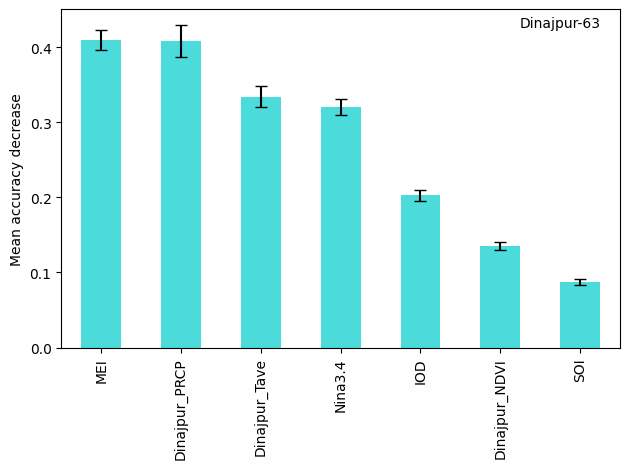

In [63]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

def calculate_permutation_importance(model, X, y, n_repeats=10, random_state=42, n_jobs=2):
    result = permutation_importance(model, X, y, n_repeats=n_repeats, random_state=random_state, n_jobs=n_jobs)
    feature_importances = pd.Series(result.importances_mean, index=X.columns)
    feature_std= pd.Series(result.importances_std, index=X.columns)
    return feature_importances, feature_std

# Define the hybrid model weights
weight_rf = 0.3
weight_lgb = 0.3
weight_catboost = 0.3
weight_BRR = 0.1

# Calculate permutation feature importances for Random Forest
rf_feature_importance, rf_feature_std = calculate_permutation_importance(best_rf, X_test, y_test)

# Calculate permutation feature importances for LightGBM
lgb_feature_importance, lgb_feature_std = calculate_permutation_importance(best_lgb, X_test, y_test)

# Calculate permutation feature importances for CatBoost
catboost_feature_importance, catboost_feature_std = calculate_permutation_importance(best_catboost, X_test, y_test)

# Calculate permutation feature importances for Bayesian Ridge
bayesian_ridge_feature_importance, bayesian_ridge_feature_std = calculate_permutation_importance(best_bayesian_ridge, X_test, y_test)


# Combine feature importances based on defined weights
hybrid_feature_importance = (weight_rf * rf_feature_importance +
                            weight_lgb * lgb_feature_importance +
                            weight_catboost * catboost_feature_importance +
                            weight_BRR * bayesian_ridge_feature_importance)

# Calculate upper and lower bounds
hybrid_feature_std = (weight_rf * rf_feature_std +
                      weight_lgb * lgb_feature_std +
                      weight_catboost * catboost_feature_std +
                      weight_BRR * bayesian_ridge_feature_std)

# Sort feature importances in ascending order
hybrid_feature_importance = hybrid_feature_importance.sort_values(ascending=False)

# The feature names and their importances
hybrid_feature_df = pd.DataFrame({
    'Feature': hybrid_feature_importance.index,
    'Importance': hybrid_feature_importance.values
})

# Display the DataFrame
print(hybrid_feature_df)

# Plot feature importances with error bars
fig, ax = plt.subplots()
hybrid_feature_importance.plot.bar(yerr=hybrid_feature_std, ax=ax, color='#00cccc', alpha=0.7, capsize=4)

upper_bound = hybrid_feature_importance + hybrid_feature_std[hybrid_feature_importance.index]
lower_bound = hybrid_feature_importance - hybrid_feature_std[hybrid_feature_importance.index]

# Adding markers for upper and lower bounds
plt.scatter(hybrid_feature_importance.index, upper_bound, color='red', alpha=0)
plt.scatter(hybrid_feature_importance.index, lower_bound, color='green', alpha=0)
plt.text(0.82, 0.98,"Dinajpur-63", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

# 5. Visualization

## Scatter plot: Training Stage: Actual vs. Predicted GWL(m)

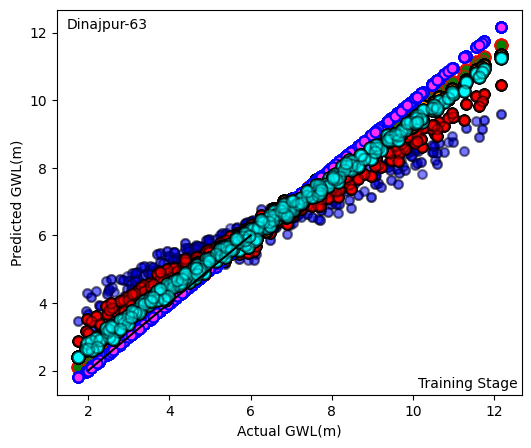

In [64]:
plt.figure(figsize=(6, 5))

plt.scatter(y_train, hybrid1_pred_train, color='blue', edgecolors='black', s=40, linewidths=1.5, alpha=0.04, label='Hybrid Model 1')
plt.scatter(y_train, hybrid2_pred_train, color='green', edgecolors='red', s=70, linewidths=1.5, alpha=0.3, label='Hybrid Model 2')
plt.scatter(y_train, hybrid3_pred_train, color='red', edgecolors='black', s=50, linewidths=1.5,alpha=0.4, label='Hybrid Model 3')
plt.scatter(y_train, hybrid4_pred_train, color='orange', edgecolors='black', s=70, linewidths=1.5, label='Hybrid Model 4')
plt.scatter(y_train,  hybrid5_pred_train, color='#FE2EF7', edgecolors='blue', s=50, linewidths=1.5, label='Hybrid Model 5')
plt.scatter(y_train, hybrid6_pred_train, color='cyan', edgecolors='black', s=70, linewidths=1.5,alpha=0.3, label='Hybrid Model 6')


plt.text(0.02, 0.98,"Dinajpur-63", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.99, 0.01, "Training Stage", transform=plt.gca().transAxes, va='bottom', ha='right', fontsize=10)
plt.plot([2, 6], [2, 6], color='black')
plt.xlabel('Actual GWL(m)')
plt.ylabel('Predicted GWL(m)')
plt.grid(False)
plt.show()

## Scatter plot: Validation Stage: Actual vs. Predicted GWL(m)

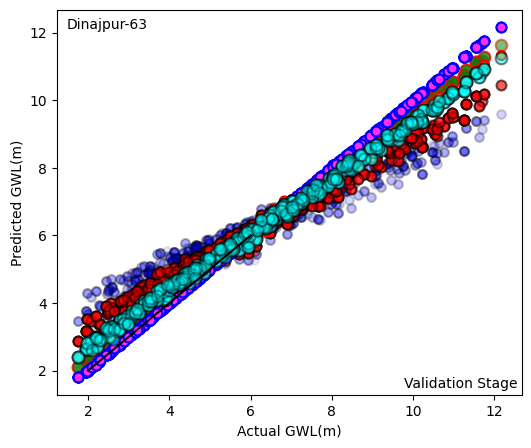

In [65]:
plt.figure(figsize=(6, 5))

plt.scatter(y_val, hybrid1_pred_val, color='blue', edgecolors='black', s=40, linewidths=1.5, alpha=0.09, label='Hybrid Model 1')
plt.scatter(y_val, hybrid2_pred_val, color='green', edgecolors='red', s=70, linewidths=1.5, alpha=0.3,   label='Hybrid Model 2')
plt.scatter(y_val, hybrid3_pred_val, color='red', edgecolors='black', s=50, linewidths=1.5,alpha=0.4, label='Hybrid Model 3')
plt.scatter(y_val, hybrid4_pred_val, color='orange', edgecolors='red', s=40, linewidths=1.5, label='Hybrid Model 4')
plt.scatter(y_val,  hybrid5_pred_val, color='#FE2EF7', edgecolors='blue', s=50, linewidths=1.5, label='Hybrid Model 5')
plt.scatter(y_val, hybrid6_pred_val, color='cyan', edgecolors='black', s=70, linewidths=1.5,alpha=0.3, label='Hybrid Model 6')

plt.text(0.02, 0.98,"Dinajpur-63", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.99, 0.01, "Validation Stage", transform=plt.gca().transAxes, va='bottom', ha='right', fontsize=10)
plt.plot([2, 6], [2, 6], color='black')
plt.xlabel('Actual GWL(m)')
plt.ylabel('Predicted GWL(m)')
plt.grid(False)
plt.show()

## Scatter plot: Test Stage: Actual vs. Predicted GWL(m)

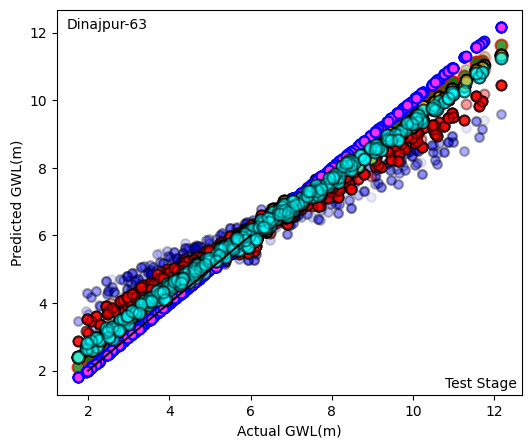

In [66]:
plt.figure(figsize=(6, 5))

plt.scatter(y_test, hybrid1_pred_test, color='blue', edgecolors='black', s=40, linewidths=1.5, alpha=0.09, label='Hybrid Model 1')
plt.scatter(y_test, hybrid2_pred_test,  color='green', edgecolors='red', s=70, linewidths=1.5, alpha=0.3,  label='Hybrid Model 2')
plt.scatter(y_test, hybrid3_pred_test, color='red', edgecolors='black', s=50, linewidths=1.5,alpha=0.4, label='Hybrid Model 3')
plt.scatter(y_test, hybrid4_pred_test, color='orange', edgecolors='black', s=70, linewidths=1.5,  label='Hybrid Model 4')
plt.scatter(y_test,  hybrid5_pred_test,color='#FE2EF7', edgecolors='blue', s=50, linewidths=1.5, label='Hybrid Model 5')
plt.scatter(y_test, hybrid6_pred_test, color='cyan', edgecolors='black', s=70, linewidths=1.5,alpha=0.3, label='Hybrid Model 6')

plt.text(0.02, 0.98,"Dinajpur-63", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.99, 0.01, "Test Stage", transform=plt.gca().transAxes, va='bottom', ha='right', fontsize=10)
plt.plot([2, 6], [2, 6], color='black')
plt.xlabel('Actual GWL(m)')
plt.ylabel('Predicted GWL(m)')
plt.grid(False)
plt.show()

## Training Stage: Comparison of Actual vs. Predicted Groundwater Levels over index using Line Plot for Hybrid Models

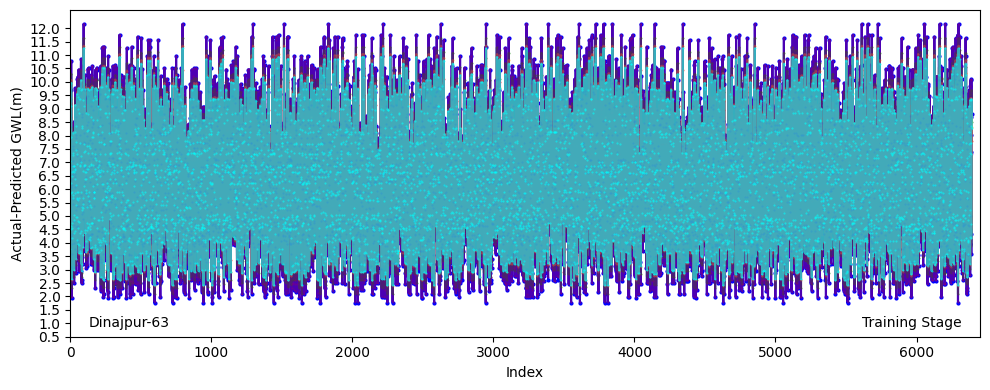

In [67]:
colors = ['#FE2EF7', 'green', 'red', 'orange', 'purple', 'cyan']

models_predictions_train = {
    'Hybrid Model 1': hybrid1_pred_train,
    'Hybrid Model 2': hybrid2_pred_train,
    'Hybrid Model 3': hybrid3_pred_train,
    'Hybrid Model 4': hybrid4_pred_train,
    'Hybrid Model 5': hybrid5_pred_train,
    'Hybrid Model 6': hybrid6_pred_train
}

actual_values = pd.DataFrame({'Actual Values': y_train.values})

plt.figure(figsize=(10, 4))

# Plotting the actual values
plt.plot(actual_values.index, actual_values['Actual Values'], label='Actual Values', linestyle='-', marker='o', markersize=2, color='blue')

# Plotting the predicted values for each model
for i, (model_name, predictions) in enumerate(models_predictions_train.items()):
    plt.plot(actual_values.index, predictions, label=model_name, linestyle='-', marker='o', markersize=.5, alpha=0.6, color=colors[i])

max_value = max(actual_values['Actual Values'].max(), np.max(np.array(list(models_predictions_train.values()))))
y_ticks = np.arange(0.5, max_value, step=0.5)
plt.yticks(y_ticks)

plt.xlabel('Index')
plt.ylabel('Actual-Predicted GWL(m)')
plt.grid(False)
plt.text(0.02, 0.02,"Dinajpur-63", transform=plt.gca().transAxes, va='bottom', ha='left', fontsize=10)
plt.text(0.98, 0.02, "Training Stage", transform=plt.gca().transAxes, va='bottom', ha='right', fontsize=10)
plt.xlim(0, 6450)
plt.tight_layout()
plt.show()

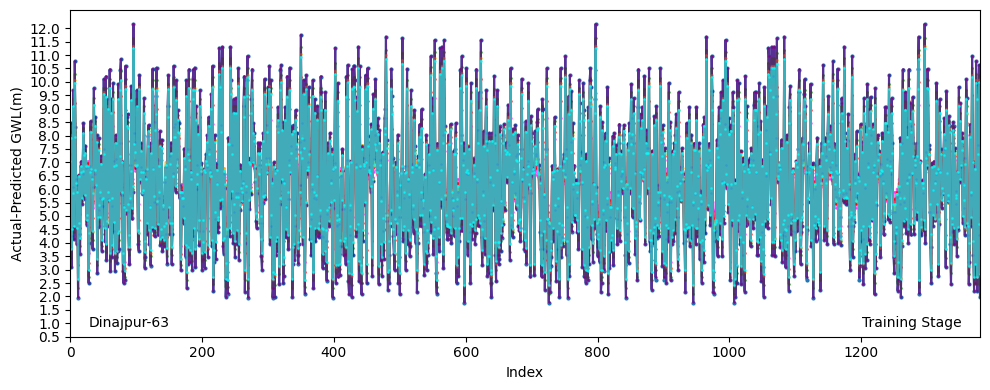

In [68]:
colors = ['#FE2EF7', 'green', 'red', 'orange', 'purple', 'cyan']

models_predictions_train = {
    'Hybrid Model 1': hybrid1_pred_train,
    'Hybrid Model 2': hybrid2_pred_train,
    'Hybrid Model 3': hybrid3_pred_train,
    'Hybrid Model 4': hybrid4_pred_train,
    'Hybrid Model 5': hybrid5_pred_train,
    'Hybrid Model 6': hybrid6_pred_train
}

actual_values = pd.DataFrame({'Actual Values': y_train.values})

plt.figure(figsize=(10, 4))

# Plotting the actual values
plt.plot(actual_values.index, actual_values['Actual Values'], label='Actual Values', linestyle='-', marker='o', markersize=2)

# Plotting the predicted values for each model
for i, (model_name, predictions) in enumerate(models_predictions_train.items()):
    plt.plot(actual_values.index, predictions, label=model_name, linestyle='-', marker='o', markersize=1, alpha=0.6, color=colors[i])

max_value = max(actual_values['Actual Values'].max(), np.max(np.array(list(models_predictions_train.values()))))
y_ticks = np.arange(0.5, max_value, step=0.5)
plt.yticks(y_ticks)

plt.xlabel('Index')
plt.ylabel('Actual-Predicted GWL(m)')
plt.grid(False)
plt.text(0.02, 0.02,"Dinajpur-63", transform=plt.gca().transAxes, va='bottom', ha='left', fontsize=10)
plt.text(0.98, 0.02, "Training Stage", transform=plt.gca().transAxes, va='bottom', ha='right', fontsize=10)
plt.tight_layout()
plt.xlim(0, 1380)
plt.show()

## Validation Stage: Comparison of Actual vs. Predicted Groundwater Levels over index using Line Plot for Hybrid Models

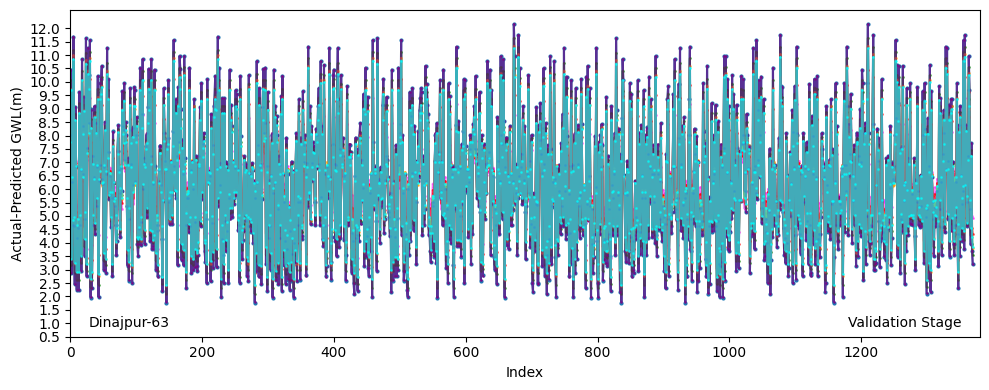

In [69]:
colors = ['#FE2EF7', 'green', 'red', 'orange', 'purple', 'cyan']

models_predictions_val = {
    'Hybrid Model 1': hybrid1_pred_val,
    'Hybrid Model 2': hybrid2_pred_val,
    'Hybrid Model 3': hybrid3_pred_val,
    'Hybrid Model 4': hybrid4_pred_val,
    'Hybrid Model 5': hybrid5_pred_val,
    'Hybrid Model 6': hybrid6_pred_val
}

actual_values = pd.DataFrame({'Actual Values': y_val.values})

plt.figure(figsize=(10, 4))

# Plotting the actual values
plt.plot(actual_values.index, actual_values['Actual Values'], label='Actual Values', linestyle='-', marker='o', markersize=2)

# Plotting the predicted values for each model
for i, (model_name, predictions) in enumerate(models_predictions_val.items()):
    plt.plot(actual_values.index, predictions, label=model_name, linestyle='-', marker='o', markersize=1, alpha=0.6, color=colors[i])

max_value = max(actual_values['Actual Values'].max(), np.max(np.array(list(models_predictions_val.values()))))
y_ticks = np.arange(0.5, max_value, step=0.5)
plt.yticks(y_ticks)

plt.xlabel('Index')
plt.ylabel('Actual-Predicted GWL(m)')
plt.grid(False)
plt.text(0.02, 0.02,"Dinajpur-63", transform=plt.gca().transAxes, va='bottom', ha='left', fontsize=10)
plt.text(0.98, 0.02, "Validation Stage", transform=plt.gca().transAxes, va='bottom', ha='right', fontsize=10)
plt.tight_layout()
plt.xlim(0, 1380)
plt.show()

## Test Stage: Comparison of Actual vs. Predicted Groundwater Levels over index using Line Plot for Hybrid Models

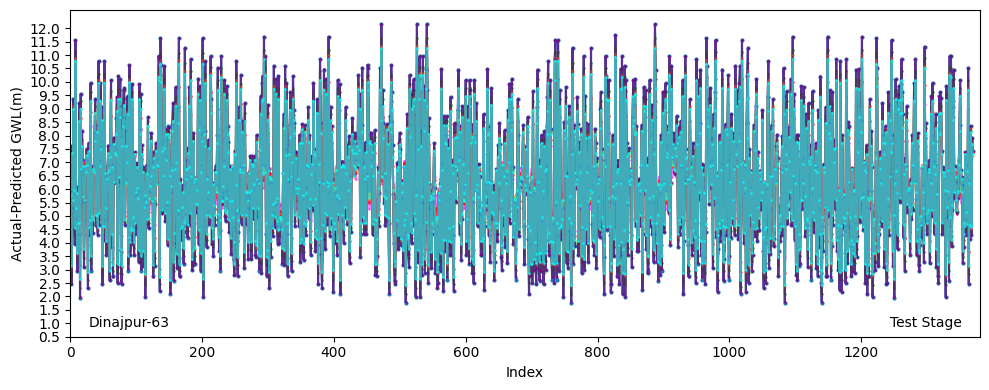

In [70]:
colors = ['#FE2EF7', 'green', 'red', 'orange', 'purple', 'cyan']

models_predictions_test = {
    'Hybrid Model 1': hybrid1_pred_test,
    'Hybrid Model 2': hybrid2_pred_test,
    'Hybrid Model 3': hybrid3_pred_test,
    'Hybrid Model 4': hybrid4_pred_test,
    'Hybrid Model 5': hybrid5_pred_test,
    'Hybrid Model 6': hybrid6_pred_test
}

actual_test = pd.DataFrame({'Actual test': y_test.values})

plt.figure(figsize=(10, 4))

# Plotting the actual test
plt.plot(actual_test.index, actual_test['Actual test'], label='Actual test', linestyle='-', marker='o', markersize=2)

# Plotting the predicted test for each model
for i, (model_name, predictions) in enumerate(models_predictions_test.items()):
    plt.plot(actual_test.index, predictions, label=model_name, linestyle='-', marker='o', markersize=1, alpha=0.6, color=colors[i])

max_testue = max(actual_test['Actual test'].max(), np.max(np.array(list(models_predictions_test.values()))))
y_ticks = np.arange(0.5, max_testue, step=0.5)
plt.yticks(y_ticks)

plt.xlabel('Index')
plt.ylabel('Actual-Predicted GWL(m)')
plt.grid(False)
plt.text(0.02, 0.02,"Dinajpur-63", transform=plt.gca().transAxes, va='bottom', ha='left', fontsize=10)
plt.text(0.98, 0.02, "Test Stage", transform=plt.gca().transAxes, va='bottom', ha='right', fontsize=10)
plt.tight_layout()
plt.xlim(0, 1380)
plt.show()

# Distribution plot and Time series analysis
## Training stage

In [71]:
dates_train = df.loc[y_train.index, 'Date']

hybrid_train_data = {'Actual Values': y_train.values,
                    'Hybrid Model 1': hybrid1_pred_train,
                    'Hybrid Model 2': hybrid2_pred_train,
                    'Hybrid Model 3': hybrid3_pred_train,
                    'Hybrid Model 4': hybrid4_pred_train,
                    'Hybrid Model 5': hybrid5_pred_train,
                    'Hybrid Model 6': hybrid6_pred_train,
                    'Date': dates_train}

hybrid_train_df = pd.DataFrame(hybrid_train_data)

print("\nTraining Set:")
hybrid_train_df


Training Set:


,Actual Values,Hybrid Model 1,Hybrid Model 2,Hybrid Model 3,Hybrid Model 4,Hybrid Model 5,Hybrid Model 6,Date
3063,7.296667,6.740424,7.186832,6.925916,6.999589,7.293684,7.048897,2001-05-22
1940,8.465000,6.809166,8.132091,7.361297,8.035949,8.465590,7.921508,1998-04-25
6848,3.092000,4.872420,3.450797,4.278811,3.753218,3.085600,3.768949,2011-10-02
3509,4.255000,4.959667,4.396955,4.724916,4.529213,4.251700,4.529240,2002-08-11
1612,6.078000,5.279226,5.919297,5.545549,5.929459,6.076576,5.842601,1997-06-01
...,...,...,...,...,...,...,...,...
5734,4.312500,5.245089,4.501520,4.934214,4.718361,4.306188,4.695679,2008-09-13
5191,7.377500,7.202238,7.341358,7.260579,7.333881,7.380672,7.311962,2007-03-20
5390,3.597500,5.055676,3.890572,4.569460,4.169648,3.595778,4.170600,2007-10-05
860,10.092500,8.140351,9.700872,8.791154,9.393571,10.095620,9.357596,1995-05-11


In [72]:
hybrid_train_df['Date'] = pd.to_datetime(hybrid_train_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_train_df = hybrid_train_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_train_df = hybrid_train_df.reset_index(drop=True)

# the sorted DataFrame
hybrid_train_df

,Actual Values,Hybrid Model 1,Hybrid Model 2,Hybrid Model 3,Hybrid Model 4,Hybrid Model 5,Hybrid Model 6,Date
0,3.162,4.646706,3.459750,4.151964,3.697830,3.168024,3.729066,1993-01-02
1,3.162,4.646706,3.459750,4.151964,3.697830,3.168024,3.729066,1993-01-03
2,3.162,4.646706,3.459750,4.151964,3.697830,3.168024,3.729066,1993-01-05
3,3.162,4.646706,3.459750,4.151964,3.697830,3.168024,3.729066,1993-01-06
4,3.162,4.646706,3.459750,4.151964,3.697830,3.168024,3.729066,1993-01-07
...,...,...,...,...,...,...,...,...
6386,4.800,5.649923,4.968682,5.366573,5.076611,4.799601,5.107933,2017-12-24
6387,4.800,5.649923,4.968682,5.366573,5.076611,4.799601,5.107933,2017-12-26
6388,4.800,5.649923,4.968682,5.366573,5.076611,4.799601,5.107933,2017-12-27
6389,4.800,5.649923,4.968682,5.366573,5.076611,4.799601,5.107933,2017-12-29


## Violin Plot: Distribution of predicted vs actual values groundwater level

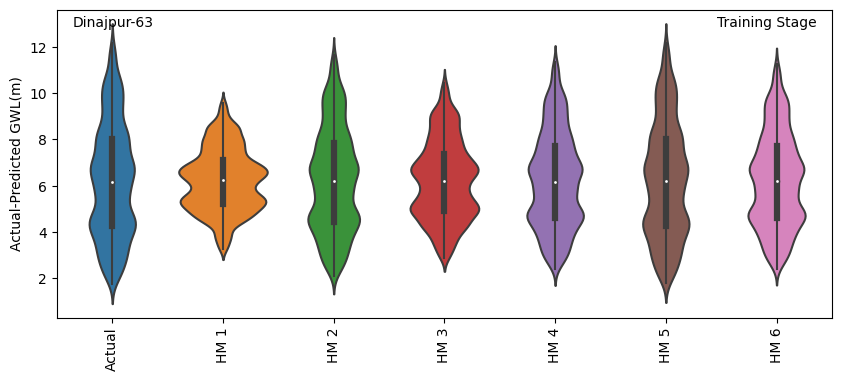

In [73]:
predictions_df = pd.DataFrame({
    'Actual': y_train.values,
    'HM 1': hybrid1_pred_train,
    'HM 2': hybrid2_pred_train,
    'HM 3': hybrid3_pred_train,
    'HM 4': hybrid4_pred_train,
    'HM 5': hybrid5_pred_train,
    'HM 6': hybrid6_pred_train
})

plt.figure(figsize=(10, 4))
ax = sns.violinplot(data=predictions_df)
plt.text(0.02, 0.98,"Dinajpur-63", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.98, 0.98, "Training Stage", transform=plt.gca().transAxes, va='top', ha='right', fontsize=10)

plt.ylabel('Actual-Predicted GWL(m)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [74]:
hybrid_train_df.T

,0,1,2,3,4,5,6,7,8,9,...,6381,6382,6383,6384,6385,6386,6387,6388,6389,6390
Actual Values,3.162,3.162,3.162,3.162,3.162,3.162,3.162,3.162,3.162,3.162,...,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8
Hybrid Model 1,4.646706,4.646706,4.646706,4.646706,4.646706,4.646706,4.646706,4.646706,4.646706,4.646706,...,5.649923,5.649923,5.649923,5.649923,5.649923,5.649923,5.649923,5.649923,5.649923,5.649923
Hybrid Model 2,3.45975,3.45975,3.45975,3.45975,3.45975,3.45975,3.45975,3.45975,3.45975,3.45975,...,4.968682,4.968682,4.968682,4.968682,4.968682,4.968682,4.968682,4.968682,4.968682,4.968682
Hybrid Model 3,4.151964,4.151964,4.151964,4.151964,4.151964,4.151964,4.151964,4.151964,4.151964,4.151964,...,5.366573,5.366573,5.366573,5.366573,5.366573,5.366573,5.366573,5.366573,5.366573,5.366573
Hybrid Model 4,3.69783,3.69783,3.69783,3.69783,3.69783,3.69783,3.69783,3.69783,3.69783,3.69783,...,5.076611,5.076611,5.076611,5.076611,5.076611,5.076611,5.076611,5.076611,5.076611,5.076611
Hybrid Model 5,3.168024,3.168024,3.168024,3.168024,3.168024,3.168024,3.168024,3.168024,3.168024,3.168024,...,4.799601,4.799601,4.799601,4.799601,4.799601,4.799601,4.799601,4.799601,4.799601,4.799601
Hybrid Model 6,3.729066,3.729066,3.729066,3.729066,3.729066,3.729066,3.729066,3.729066,3.729066,3.729066,...,5.107933,5.107933,5.107933,5.107933,5.107933,5.107933,5.107933,5.107933,5.107933,5.107933
Date,1993-01-02 00:00:00,1993-01-03 00:00:00,1993-01-05 00:00:00,1993-01-06 00:00:00,1993-01-07 00:00:00,1993-01-08 00:00:00,1993-01-10 00:00:00,1993-01-11 00:00:00,1993-01-12 00:00:00,1993-01-14 00:00:00,...,2017-12-16 00:00:00,2017-12-18 00:00:00,2017-12-19 00:00:00,2017-12-20 00:00:00,2017-12-22 00:00:00,2017-12-24 00:00:00,2017-12-26 00:00:00,2017-12-27 00:00:00,2017-12-29 00:00:00,2017-12-31 00:00:00


# Time series plots: predicted vs actual values groundwater level

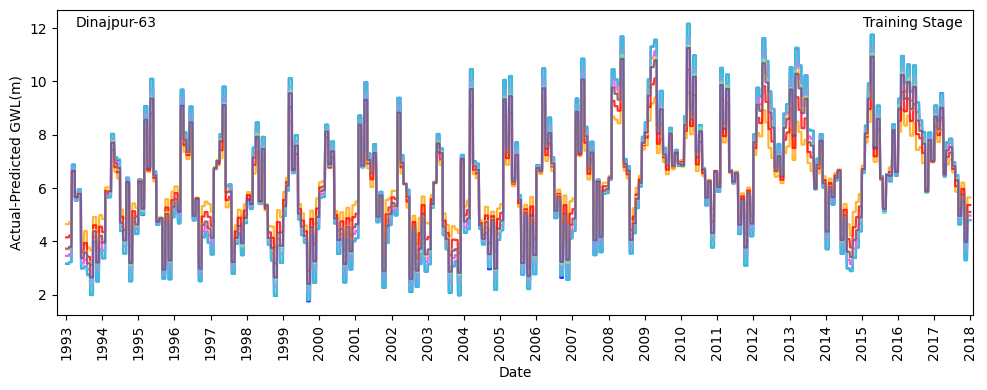

In [75]:
# Converting the 'Date' column to datetime format
hybrid_train_df['Date'] = pd.to_datetime(hybrid_train_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_train_df = hybrid_train_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_train_df = hybrid_train_df.reset_index(drop=True)

# Creating a time series plot
plt.figure(figsize=(10, 4))

# Define a list of colors (you can change these to your preferred colors)
colors = ['blue', 'orange','#FE2EF7', 'red', 'yellow', '#40E0D0', '#7D3C98', 'purple']

# Iterating over the hybrid models and plot their predictions with different colors
for i, col in enumerate(hybrid_train_df.columns[:-1]):
    plt.plot(hybrid_train_df['Date'], hybrid_train_df[col], label=col, color=colors[i], alpha=0.8, linewidth=1.6)

plt.xlabel('Date')
plt.ylabel('Actual-Predicted GWL(m)')
plt.xticks(rotation=90, color='black') 
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlim(pd.Timestamp('1992-10-01'), pd.Timestamp('2018-01-31'))
plt.text(0.02, 0.98, "Dinajpur-63", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.88, 0.98, "Training Stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.tight_layout()
plt.show()

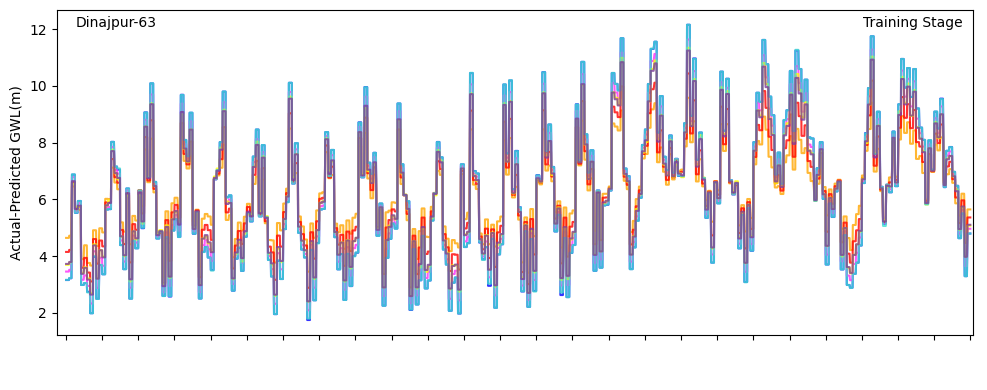

In [76]:
# Converting the 'Date' column to datetime format
hybrid_train_df['Date'] = pd.to_datetime(hybrid_train_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_train_df = hybrid_train_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_train_df = hybrid_train_df.reset_index(drop=True)

# Creating a time series plot
plt.figure(figsize=(10, 4))

# Define a list of colors (you can change these to your preferred colors)
colors = ['blue', 'orange','#FE2EF7', 'red', 'yellow', '#40E0D0', '#7D3C98', 'purple']

# Iterating over the hybrid models and plot their predictions with different colors
for i, col in enumerate(hybrid_train_df.columns[:-1]):
    plt.plot(hybrid_train_df['Date'], hybrid_train_df[col], label=col, color=colors[i], alpha=0.8, linewidth=1.5)

plt.ylabel('Actual-Predicted GWL(m)')
plt.xticks(rotation=90, color='white') 
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlim(pd.Timestamp('1992-10-01'), pd.Timestamp('2018-01-31'))
plt.text(0.02, 0.98, "Dinajpur-63", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.88, 0.98, "Training Stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.tight_layout()
plt.show()

# Distribution plot and Time series analysis
## Validation stage

In [77]:
dates_val = df.loc[y_val.index, 'Date']

hybrid_val_data = {'Actual Values': y_val.values,
                    'Hybrid Model 1': hybrid1_pred_val,
                    'Hybrid Model 2': hybrid2_pred_val,
                    'Hybrid Model 3': hybrid3_pred_val,
                    'Hybrid Model 4': hybrid4_pred_val,
                    'Hybrid Model 5': hybrid5_pred_val,
                    'Hybrid Model 6': hybrid6_pred_val,
                    'Date': dates_val}

hybrid_val_df = pd.DataFrame(hybrid_val_data)

print("\nValidation Set:")
hybrid_val_df


Validation Set:


,Actual Values,Hybrid Model 1,Hybrid Model 2,Hybrid Model 3,Hybrid Model 4,Hybrid Model 5,Hybrid Model 6,Date
7609,8.022000,7.456335,7.906069,7.645102,7.724525,8.021528,7.769080,2013-11-01
4084,10.455000,8.470667,10.057118,9.132336,9.742608,10.454157,9.711987,2004-03-08
7920,2.890000,4.217104,3.155570,3.774807,3.397221,2.886794,3.413363,2014-09-08
8327,6.253333,6.776605,6.359592,6.602057,6.457304,6.257007,6.459391,2015-10-20
2716,4.672500,5.148678,4.766574,4.990265,4.836259,4.648803,4.852290,2000-06-09
...,...,...,...,...,...,...,...,...
5762,5.252000,6.013920,5.406026,5.760063,5.662935,5.249789,5.598848,2008-10-11
3254,3.942500,5.548531,4.264524,5.013011,4.556793,3.941879,4.566764,2001-11-29
4541,7.712500,6.446418,7.454557,6.868540,7.249158,7.712220,7.240882,2005-06-08
350,3.690000,4.985291,3.947998,4.553444,4.217260,3.693055,4.211017,1993-12-17


In [78]:
hybrid_val_df['Date'] = pd.to_datetime(hybrid_val_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_val_df = hybrid_val_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_val_df = hybrid_val_df.reset_index(drop=True)

# the sorted DataFrame
hybrid_val_df

,Actual Values,Hybrid Model 1,Hybrid Model 2,Hybrid Model 3,Hybrid Model 4,Hybrid Model 5,Hybrid Model 6,Date
0,3.162,4.646706,3.459750,4.151964,3.697830,3.164824,3.729066,1993-01-09
1,3.162,4.646706,3.459750,4.151964,3.697830,3.164824,3.729066,1993-01-15
2,3.162,4.646706,3.459750,4.151964,3.697830,3.164824,3.729066,1993-01-18
3,3.162,4.646706,3.459750,4.151964,3.697830,3.164824,3.729066,1993-01-20
4,3.162,4.646706,3.459750,4.151964,3.697830,3.164824,3.729066,1993-01-24
...,...,...,...,...,...,...,...,...
1365,3.298,5.057253,3.652918,4.470467,3.981991,3.297954,3.979967,2017-11-10
1366,4.800,5.649923,4.968682,5.366573,5.076611,4.801436,5.107933,2017-12-17
1367,4.800,5.649923,4.968682,5.366573,5.076611,4.801436,5.107933,2017-12-21
1368,4.800,5.649923,4.968682,5.366573,5.076611,4.801436,5.107933,2017-12-23


## Violin Plot: Distribution of predicted vs actual values groundwater level

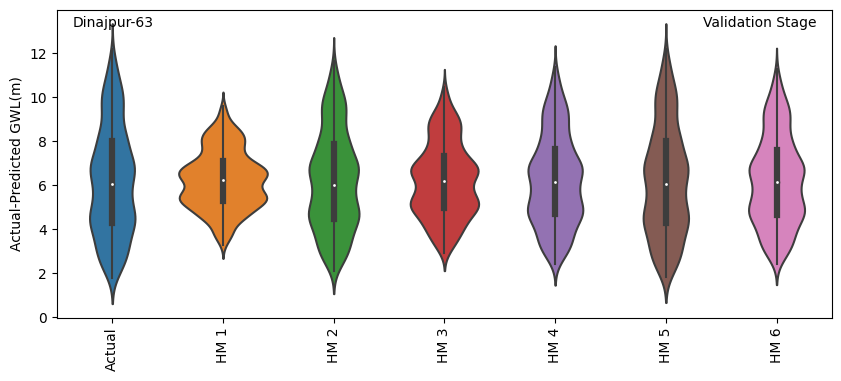

In [79]:
predictions_df = pd.DataFrame({
    'Actual': y_val.values,
    'HM 1': hybrid1_pred_val,
    'HM 2': hybrid2_pred_val,
    'HM 3': hybrid3_pred_val,
    'HM 4': hybrid4_pred_val,
    'HM 5': hybrid5_pred_val,
    'HM 6': hybrid6_pred_val
})

plt.figure(figsize=(10, 4))
ax = sns.violinplot(data=predictions_df)
plt.text(0.02, 0.98,"Dinajpur-63", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.98, 0.98, "Validation Stage", transform=plt.gca().transAxes, va='top', ha='right', fontsize=10)

plt.ylabel('Actual-Predicted GWL(m)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [80]:
hybrid_val_df.T

,0,1,2,3,4,5,6,7,8,9,...,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369
Actual Values,3.162,3.162,3.162,3.162,3.162,3.223333,3.223333,3.223333,3.223333,3.223333,...,5.5,5.5,5.5,3.298,3.298,3.298,4.8,4.8,4.8,4.8
Hybrid Model 1,4.646706,4.646706,4.646706,4.646706,4.646706,4.723266,4.723266,4.723266,4.723266,4.723266,...,6.204508,6.204508,6.204508,5.057253,5.057253,5.057253,5.649923,5.649923,5.649923,5.649923
Hybrid Model 2,3.45975,3.45975,3.45975,3.45975,3.45975,3.522496,3.522496,3.522496,3.522496,3.522496,...,5.637853,5.637853,5.637853,3.652918,3.652918,3.652918,4.968682,4.968682,4.968682,4.968682
Hybrid Model 3,4.151964,4.151964,4.151964,4.151964,4.151964,4.223056,4.223056,4.223056,4.223056,4.223056,...,5.969715,5.969715,5.969715,4.470467,4.470467,4.470467,5.366573,5.366573,5.366573,5.366573
Hybrid Model 4,3.69783,3.69783,3.69783,3.69783,3.69783,3.779914,3.779914,3.779914,3.779914,3.779914,...,5.716985,5.716985,5.716985,3.981991,3.981991,3.981991,5.076611,5.076611,5.076611,5.076611
Hybrid Model 5,3.164824,3.164824,3.164824,3.164824,3.164824,3.228745,3.228745,3.228745,3.228745,3.228745,...,5.510294,5.510294,5.510294,3.297954,3.297954,3.297954,4.801436,4.801436,4.801436,4.801436
Hybrid Model 6,3.729066,3.729066,3.729066,3.729066,3.729066,3.798159,3.798159,3.798159,3.798159,3.798159,...,5.751406,5.751406,5.751406,3.979967,3.979967,3.979967,5.107933,5.107933,5.107933,5.107933
Date,1993-01-09 00:00:00,1993-01-15 00:00:00,1993-01-18 00:00:00,1993-01-20 00:00:00,1993-01-24 00:00:00,1993-02-07 00:00:00,1993-02-11 00:00:00,1993-02-18 00:00:00,1993-02-20 00:00:00,1993-02-26 00:00:00,...,2017-10-13 00:00:00,2017-10-14 00:00:00,2017-10-25 00:00:00,2017-11-01 00:00:00,2017-11-02 00:00:00,2017-11-10 00:00:00,2017-12-17 00:00:00,2017-12-21 00:00:00,2017-12-23 00:00:00,2017-12-25 00:00:00


# Time series plots: predicted vs actual values groundwater level

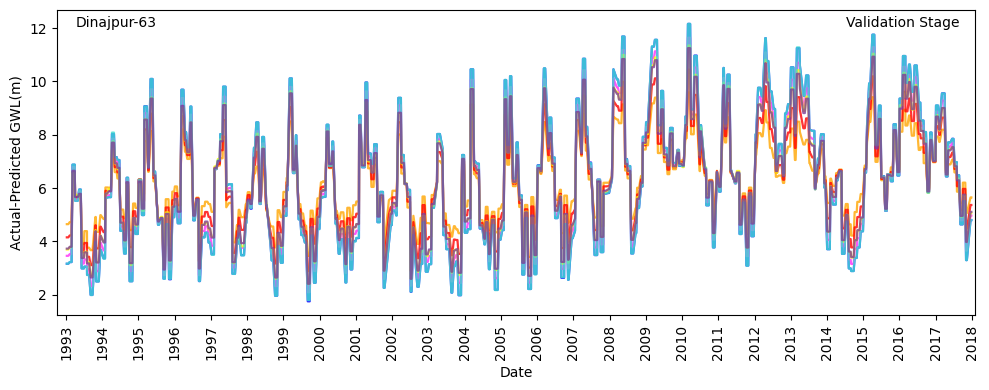

In [81]:
# Converting the 'Date' column to datetime format
hybrid_val_df['Date'] = pd.to_datetime(hybrid_val_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_val_df = hybrid_val_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_val_df = hybrid_val_df.reset_index(drop=True)

# Creating a time series plot
plt.figure(figsize=(10, 4))

# Define a list of colors (you can change these to your preferred colors)
colors = ['blue', 'orange','#FE2EF7', 'red', 'yellow', '#40E0D0', '#7D3C98', 'purple']

# Iterating over the hybrid models and plot their predictions with different colors
for i, col in enumerate(hybrid_val_df.columns[:-1]):
    plt.plot(hybrid_val_df['Date'], hybrid_val_df[col], label=col, color=colors[i], alpha=0.8, linewidth=1.6)

plt.xlabel('Date')
plt.ylabel('Actual-Predicted GWL(m)')
plt.xticks(rotation=90, color='black') 
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlim(pd.Timestamp('1992-10-01'), pd.Timestamp('2018-01-31'))
plt.text(0.02, 0.98, "Dinajpur-63", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.86, 0.98, "Validation Stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.tight_layout()
plt.show()

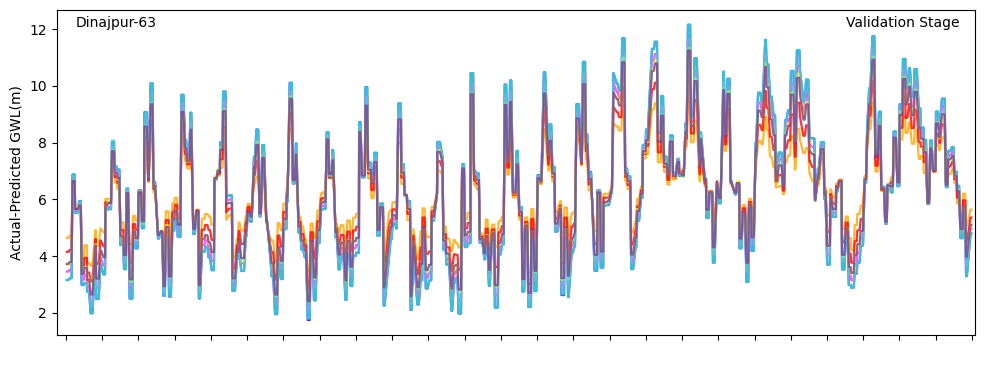

In [82]:
# Converting the 'Date' column to datetime format
hybrid_val_df['Date'] = pd.to_datetime(hybrid_val_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_val_df = hybrid_val_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_val_df = hybrid_val_df.reset_index(drop=True)

# Creating a time series plot
plt.figure(figsize=(10, 4))

# Define a list of colors (you can change these to your preferred colors)
colors = ['blue', 'orange','#FE2EF7', 'red', 'yellow', '#40E0D0', '#7D3C98', 'purple']

# Iterating over the hybrid models and plot their predictions with different colors
for i, col in enumerate(hybrid_val_df.columns[:-1]):
    plt.plot(hybrid_val_df['Date'], hybrid_val_df[col], label=col, color=colors[i], alpha=0.8, linewidth=1.6)


plt.ylabel('Actual-Predicted GWL(m)')
plt.xticks(rotation=90, color='white') 
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlim(pd.Timestamp('1992-10-01'), pd.Timestamp('2018-01-31'))
plt.text(0.02, 0.98, "Dinajpur-63", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.86, 0.98, "Validation Stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.tight_layout()
plt.show()

# Distribution plot and Time series analysis
## Test stage

In [83]:
dates_test = df.loc[y_test.index, 'Date']

hybrid_test_data = {'Actual Values': y_test.values,
                    'Hybrid Model 1': hybrid1_pred_test,
                    'Hybrid Model 2': hybrid2_pred_test,
                    'Hybrid Model 3': hybrid3_pred_test,
                    'Hybrid Model 4': hybrid4_pred_test,
                    'Hybrid Model 5': hybrid5_pred_test,
                    'Hybrid Model 6': hybrid6_pred_test,
                    'Date': dates_test}

hybrid_test_df = pd.DataFrame(hybrid_test_data)

print("\nTest Set:")
hybrid_test_df


Test Set:


,Actual Values,Hybrid Model 1,Hybrid Model 2,Hybrid Model 3,Hybrid Model 4,Hybrid Model 5,Hybrid Model 6,Date
4710,4.604000,5.663627,4.810518,5.310230,4.887293,4.605920,4.967861,2005-11-24
131,5.946000,5.634498,5.881817,5.738520,5.743197,5.949194,5.784238,1993-05-12
2802,2.460000,4.263165,2.820954,3.661568,3.110814,2.458896,3.146435,2000-09-03
4472,7.622000,6.876824,7.472685,7.125286,7.339148,7.627004,7.332927,2005-03-31
1108,5.303333,6.062013,5.450138,5.809318,5.569678,5.302034,5.591218,1996-01-14
...,...,...,...,...,...,...,...,...
2948,4.124000,5.496844,4.402156,5.038862,4.647571,4.134192,4.650367,2001-01-27
6394,8.360000,7.416728,8.170862,7.731184,8.270476,8.360503,8.126129,2010-07-05
1746,4.295000,5.186431,4.476358,4.889369,4.508782,4.306157,4.580887,1997-10-13
5820,7.922500,7.446285,7.826264,7.604989,7.653859,7.919776,7.697005,2008-12-08


In [84]:
# Converting the 'Date' column to datetime format
hybrid_test_df['Date'] = pd.to_datetime(hybrid_test_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_test_df = hybrid_test_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_test_df = hybrid_test_df.reset_index(drop=True)
hybrid_test_df

,Actual Values,Hybrid Model 1,Hybrid Model 2,Hybrid Model 3,Hybrid Model 4,Hybrid Model 5,Hybrid Model 6,Date
0,3.162,4.646706,3.459750,4.151964,3.697830,3.167975,3.729066,1993-01-01
1,3.162,4.646706,3.459750,4.151964,3.697830,3.167975,3.729066,1993-01-04
2,3.162,4.646706,3.459750,4.151964,3.697830,3.167975,3.729066,1993-01-13
3,3.162,4.646706,3.459750,4.151964,3.697830,3.167975,3.729066,1993-01-27
4,3.162,4.646706,3.459750,4.151964,3.697830,3.167975,3.729066,1993-01-31
...,...,...,...,...,...,...,...,...
1365,3.298,5.057253,3.652918,4.470467,3.981991,3.296605,3.979967,2017-11-30
1366,4.800,5.649923,4.968682,5.366573,5.076611,4.799192,5.107933,2017-12-07
1367,4.800,5.649923,4.968682,5.366573,5.076611,4.799192,5.107933,2017-12-10
1368,4.800,5.649923,4.968682,5.366573,5.076611,4.799192,5.107933,2017-12-28


# Violin Plot: Distribution of Predicted vs Actual Values

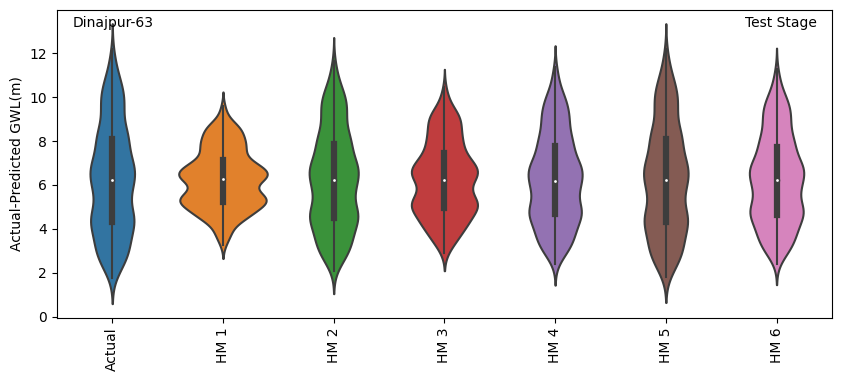

In [85]:
# Combining the predicted values into a single DataFrame
predictions_df = pd.DataFrame({
    'Actual': y_test.values,
    'HM 1': hybrid1_pred_test,
    'HM 2': hybrid2_pred_test,
    'HM 3': hybrid3_pred_test,
    'HM 4': hybrid4_pred_test,
    'HM 5': hybrid5_pred_test,
    'HM 6': hybrid6_pred_test
})

plt.figure(figsize=(10, 4))
ax = sns.violinplot(data=predictions_df)

plt.ylabel('Actual-Predicted GWL(m)')
plt.text(0.02, 0.98,"Dinajpur-63", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.98, 0.98, "Test Stage", transform=plt.gca().transAxes, va='top', ha='right', fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [86]:
# Converting the 'Date' column to datetime format
hybrid_test_df['Date'] = pd.to_datetime(hybrid_test_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_test_df = hybrid_test_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_test_df = hybrid_test_df.reset_index(drop=True)

# the sorted DataFrame
hybrid_test_df.T

,0,1,2,3,4,5,6,7,8,9,...,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369
Actual Values,3.162,3.162,3.162,3.162,3.162,3.223333,3.223333,3.223333,3.223333,3.223333,...,3.298,3.298,3.298,3.298,3.298,3.298,4.8,4.8,4.8,4.8
Hybrid Model 1,4.646706,4.646706,4.646706,4.646706,4.646706,4.723266,4.723266,4.723266,4.723266,4.723266,...,5.057253,5.057253,5.057253,5.057253,5.057253,5.057253,5.649923,5.649923,5.649923,5.649923
Hybrid Model 2,3.45975,3.45975,3.45975,3.45975,3.45975,3.522496,3.522496,3.522496,3.522496,3.522496,...,3.652918,3.652918,3.652918,3.652918,3.652918,3.652918,4.968682,4.968682,4.968682,4.968682
Hybrid Model 3,4.151964,4.151964,4.151964,4.151964,4.151964,4.223056,4.223056,4.223056,4.223056,4.223056,...,4.470467,4.470467,4.470467,4.470467,4.470467,4.470467,5.366573,5.366573,5.366573,5.366573
Hybrid Model 4,3.69783,3.69783,3.69783,3.69783,3.69783,3.779914,3.779914,3.779914,3.779914,3.779914,...,3.981991,3.981991,3.981991,3.981991,3.981991,3.981991,5.076611,5.076611,5.076611,5.076611
Hybrid Model 5,3.167975,3.167975,3.167975,3.167975,3.167975,3.232247,3.232247,3.232247,3.232247,3.232247,...,3.296605,3.296605,3.296605,3.296605,3.296605,3.296605,4.799192,4.799192,4.799192,4.799192
Hybrid Model 6,3.729066,3.729066,3.729066,3.729066,3.729066,3.798159,3.798159,3.798159,3.798159,3.798159,...,3.979967,3.979967,3.979967,3.979967,3.979967,3.979967,5.107933,5.107933,5.107933,5.107933
Date,1993-01-01 00:00:00,1993-01-04 00:00:00,1993-01-13 00:00:00,1993-01-27 00:00:00,1993-01-31 00:00:00,1993-02-01 00:00:00,1993-02-03 00:00:00,1993-02-09 00:00:00,1993-02-17 00:00:00,1993-02-21 00:00:00,...,2017-11-20 00:00:00,2017-11-25 00:00:00,2017-11-26 00:00:00,2017-11-28 00:00:00,2017-11-29 00:00:00,2017-11-30 00:00:00,2017-12-07 00:00:00,2017-12-10 00:00:00,2017-12-28 00:00:00,2017-12-30 00:00:00


# Time series plots: Test stage

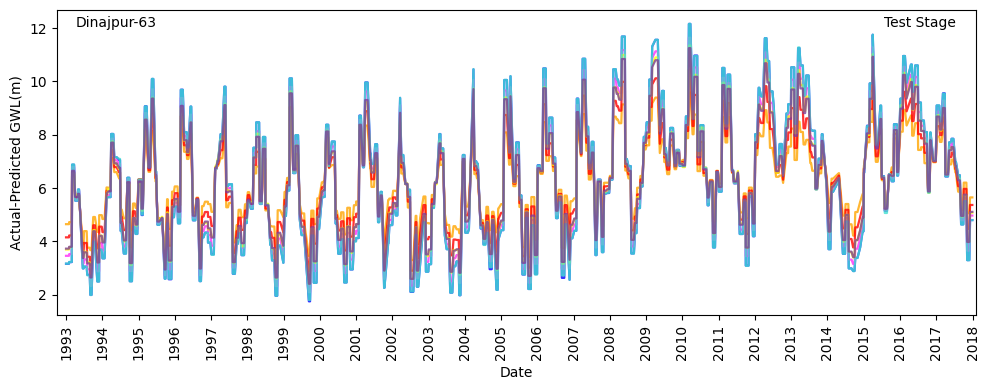

In [87]:
# Converting the 'Date' column to datetime format
hybrid_test_df['Date'] = pd.to_datetime(hybrid_test_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_test_df = hybrid_test_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_test_df = hybrid_test_df.reset_index(drop=True)

# Creating a time series plot
plt.figure(figsize=(10, 4))

# Define a list of colors (you can change these to your preferred colors)
colors = ['blue', 'orange','#FE2EF7', 'red', 'yellow', '#40E0D0', '#7D3C98', 'purple']

# Iterating over the hybrid models and plot their predictions with different colors
for i, col in enumerate(hybrid_test_df.columns[:-1]):
    plt.plot(hybrid_test_df['Date'], hybrid_test_df[col], label=col, color=colors[i], alpha=0.8, linewidth=1.6)

plt.xlabel('Date')
plt.ylabel('Actual-Predicted GWL(m)')
plt.xticks(rotation=90, color='black') 
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlim(pd.Timestamp('1992-10-01'), pd.Timestamp('2018-01-31'))
plt.text(0.02, 0.98, "Dinajpur-63", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.90, 0.98, "Test Stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.tight_layout()
plt.show()

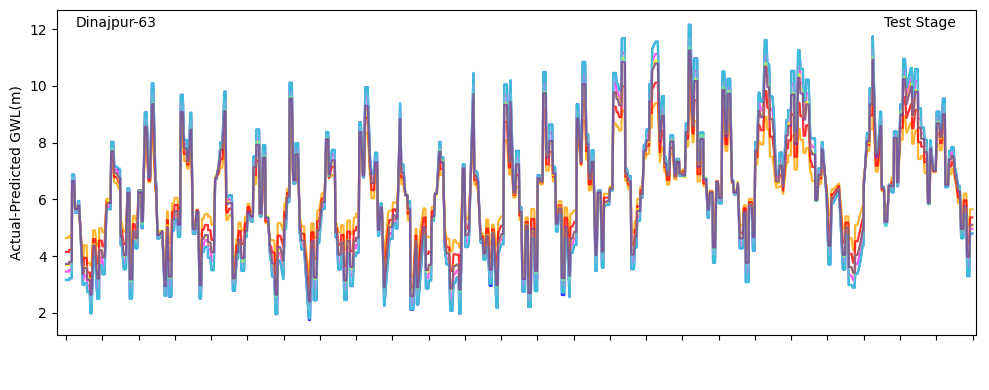

In [88]:
# Converting the 'Date' column to datetime format
hybrid_test_df['Date'] = pd.to_datetime(hybrid_test_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_test_df = hybrid_test_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_test_df = hybrid_test_df.reset_index(drop=True)

# Creating a time series plot
plt.figure(figsize=(10, 4))

# Define a list of colors (you can change these to your preferred colors)
colors = ['blue', 'orange','#FE2EF7', 'red', 'yellow', '#40E0D0', '#7D3C98', 'purple']

# Iterating over the hybrid models and plot their predictions with different colors
for i, col in enumerate(hybrid_test_df.columns[:-1]):
    plt.plot(hybrid_test_df['Date'], hybrid_test_df[col], label=col, color=colors[i], alpha=0.8, linewidth=1.6)

plt.ylabel('Actual-Predicted GWL(m)')
plt.xticks(rotation=90, color='white') 
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlim(pd.Timestamp('1992-10-01'), pd.Timestamp('2018-01-31'))
plt.text(0.02, 0.98, "Dinajpur-63", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.90, 0.98, "Test Stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.tight_layout()
plt.show()

# Density Plot: Training stage

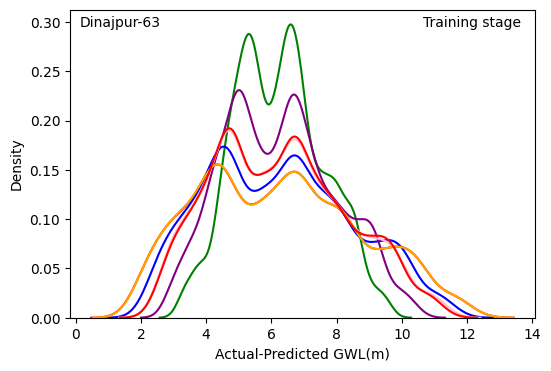

In [89]:
plt.figure(figsize=(6, 4))

# Plotting density plots for each hybrid model
sns.kdeplot(y_train.values, color='red', label='Hybrid Model 1')
sns.kdeplot(hybrid1_pred_train, color='green', label='Hybrid Model 1')
sns.kdeplot(hybrid2_pred_train, color='blue', label='Hybrid Model 2')
sns.kdeplot(hybrid3_pred_train, color='purple', label='Hybrid Model 3')
sns.kdeplot(hybrid4_pred_train, color='pink', label='Hybrid Model 4')
sns.kdeplot(hybrid5_pred_train, color='orange', label='Hybrid Model 5')
sns.kdeplot(hybrid6_pred_train, color='red', label='Hybrid Model 6')

# Customize the plot
plt.xlabel('Actual-Predicted GWL(m)')
plt.ylabel('Density')
plt.grid(False)
plt.text(0.02, 0.98,"Dinajpur-63", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.76, 0.98, "Training stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.show()

# Density Plot: Validation stage

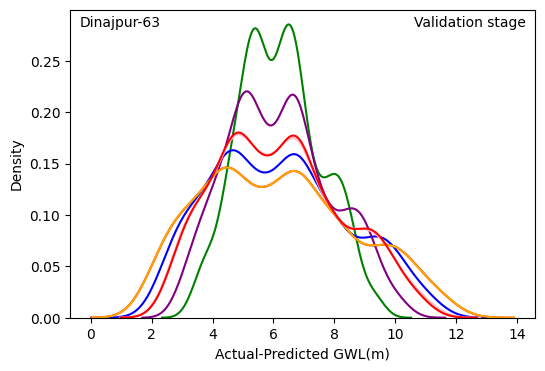

In [90]:
plt.figure(figsize=(6, 4))

# Plotting density plots for each hybrid model
sns.kdeplot(y_val.values, color='red', label='Hybrid Model 1')
sns.kdeplot(hybrid1_pred_val, color='green', label='Hybrid Model 1')
sns.kdeplot(hybrid2_pred_val, color='blue', label='Hybrid Model 2')
sns.kdeplot(hybrid3_pred_val, color='purple', label='Hybrid Model 3')
sns.kdeplot(hybrid4_pred_val, color='pink', label='Hybrid Model 4')
sns.kdeplot(hybrid5_pred_val, color='orange', label='Hybrid Model 5')
sns.kdeplot(hybrid6_pred_val, color='red', label='Hybrid Model 6')

# Customize the plot
plt.xlabel('Actual-Predicted GWL(m)')
plt.ylabel('Density')
plt.grid(False)
plt.text(0.02, 0.98,"Dinajpur-63", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.74, 0.98, "Validation stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.show()

# Density Plot: Test stage

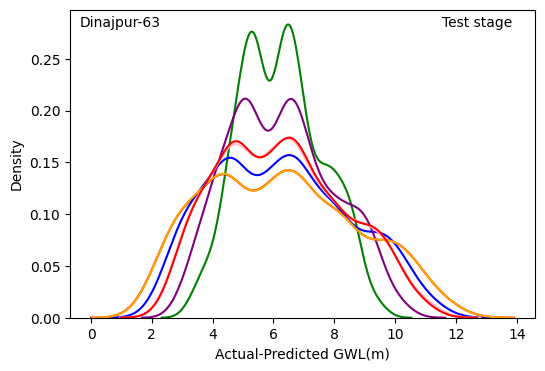

In [91]:
plt.figure(figsize=(6, 4))

# Plotting density plots for each hybrid model
sns.kdeplot(y_test.values, color='red', label='Hybrid Model 1')
sns.kdeplot(hybrid1_pred_test, color='green', label='Hybrid Model 1')
sns.kdeplot(hybrid2_pred_test, color='blue', label='Hybrid Model 2')
sns.kdeplot(hybrid3_pred_test, color='purple', label='Hybrid Model 3')
sns.kdeplot(hybrid4_pred_test, color='pink', label='Hybrid Model 4')
sns.kdeplot(hybrid5_pred_test, color='orange', label='Hybrid Model 5')
sns.kdeplot(hybrid6_pred_test, color='red', label='Hybrid Model 6')

# Customize the plot
plt.xlabel('Actual-Predicted GWL(m)')
plt.ylabel('Density')
plt.grid(False)
plt.text(0.02, 0.98,"Dinajpur-63", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.80, 0.98, "Test stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.show()